# Current aviation roadmaps are not within planetary boundaries

Bastien Païs (1)*, Alexandre Gondran (2), Lorie Hamelin (3) and Florian Simatos (1)\
(1) Fédération ENAC ISAE-SUPAERO ONERA, Université de Toulouse, France\
(2) ENAC, Université de Toulouse, Toulouse, France\
(3) TBI, Université de Toulouse, CNRS, INRAE, INSA, Toulouse, France\
*Corresponding author: bastien.pais@isae.fr

In [200]:
import numpy as np
import pandas as pd
import math
from math import *

# Variables

## Planetary boundaries list

In [244]:
EFs = ['N', 'P', 'FWU', 'LSC', 'O3', 'BIIDLU', 'CO2', 'CO2nonfossil', 'CO2capture', 'CH4', 'N2O']
PBs =['RFtotal', 'PPMtotal', 'N', 'P', 'LSC', 'O3' ,'FWU', 'BIIDLU', 'BIICC','BIItotal']
units=['W/m²', 'ppm', 'Tg N/yr', 'TG P/yr', '% of original forest cover', 'DLU', 'km3', '% BII loss', '% BII loss', '% BII loss']

## 2023 traffic

In [302]:
traffic_2023=8.48e12 #RPK Source: IATA Industry Statistics

## Allocations of SOS

In [303]:
SOS=[1,72,62,9.96,25,15,4000,10,10,10] #Source: Rockström et al. 2009, Steffen et al. 2015 and Richardson et al. 2023
SoSOS_GDP_without_tourism=0.029 #Source: ATAG Aviation Benefits Beyond Borders 2020
SoSOS_GDP=0.041 #Source: ATAG Aviation Benefits Beyond Borders 2020
SoSOS_FHN_AeroSCOPE=[0.0088, 0.0088, 0.00016201618133512, 0.000017057109834137200, 0.0246, 0.00398, 0.0222, 0.00012, 0.00012, 0.00012] #Source: Salgas et al. 2024
SoSOS_FHN_ICCT=[0.0088,0.0088,0.00019, 0.00002, 0.02525, 0.00435, 0.01791, 0.00007,0.00007,0.00007] #Source: Graver, Rutherford et Zheng 2020

In [304]:
# Dictionnary declaration
PB_aviation={}
PB_aviation['FHN']={}
PB_aviation['FHN_ICCT']={}
PB_aviation['GDP']={}
PB_aviation['GDP_without_tourism']={}
for PB in PBs:
    PB_aviation['FHN'][PB]={}
    PB_aviation['FHN_ICCT'][PB]={}
    PB_aviation['GDP'][PB]={}
    PB_aviation['GDP_without_tourism'][PB]={}
multipleFHN=[]
multipleFHN_ICCT=[]
multipleGDP=[]
multipleGDP_without_tourism=[]
for i in range(len(SOS)):
    multipleFHN.append(SoSOS_FHN_AeroSCOPE[i]*SOS[i])
    multipleFHN_ICCT.append(SoSOS_FHN_ICCT[i]*SOS[i])
    multipleGDP.append(SoSOS_GDP*SOS[i])
    multipleGDP_without_tourism.append(SoSOS_GDP_without_tourism*SOS[i])
for PB in PBs:
    PB_aviation['FHN'][PB]=multipleFHN[PBs.index(PB)]
    PB_aviation['FHN_ICCT'][PB]=multipleFHN_ICCT[PBs.index(PB)]
    PB_aviation['GDP'][PB]=multipleGDP[PBs.index(PB)]
    PB_aviation['GDP_without_tourism'][PB]=multipleGDP_without_tourism[PBs.index(PB)]

## Bern Carbon cycle constants

In [205]:
emissions_categories=['CO2', 'CO2nonfossil', 'CO2capture', 'CH4', 'N2O']
type_constantes=['molar mass', 'atmospheric concentration']
bern_carbon_cycle={}
for constantes in type_constantes:
    if constantes not in bern_carbon_cycle:
        bern_carbon_cycle[constantes]={}
        
for emissions in emissions_categories:
    if emissions not in bern_carbon_cycle['molar mass']:
        bern_carbon_cycle['molar mass'][emissions]={}
    if emissions not in bern_carbon_cycle['atmospheric concentration']:
        bern_carbon_cycle['atmospheric concentration'][emissions]={}
#CO2
a0=0.212
a1=0.244
a2=0.336
a3=0.207
alpha1=336.4
alpha2=27.89
alpha3=4.055

#CH4
alpha_methane=12.4

#N2O
alpha_N2O=121

#Molar mass
bern_carbon_cycle['molar mass']['CO2']=44
bern_carbon_cycle['molar mass']['CO2nonfossil']=44
bern_carbon_cycle['molar mass']['CO2capture']=44
bern_carbon_cycle['molar mass']['CH4']=16.04
bern_carbon_cycle['molar mass']['N2O']=44.013
air_molar_mass=28.97

#Constants
sens_RF_CO2=5.35
alpha_CH4=0.036
alpha_N2O=0.12

#Atmospheric concentrations (2019)
bern_carbon_cycle['atmospheric concentration']['CO2']=410
bern_carbon_cycle['atmospheric concentration']['CO2nonfossil']=410
bern_carbon_cycle['atmospheric concentration']['CO2capture']=410
bern_carbon_cycle['atmospheric concentration']['CH4']=1866 #ppb
bern_carbon_cycle['atmospheric concentration']['N2O']=332 #ppb

## Dynamic BII constants

In [206]:
MSA_factor=6.31342e12 # % loss m² °C-1 Source: Hanafiah et al. (2012)
total_area=1.3e14 #total area of the natural and non-natural biomes in the IMAGE model Source: Alkemade et al. (2009)
climate_sens_param=1.06 #climate sensitivity parameter Source: IPCC AR5 and Ryberg et al. (2018)
CF_BII_climate=100*(MSA_factor*climate_sens_param)/total_area

## Historical climate impacts

In [305]:
historical_ppm_2018=2.58 #Source: Lee et al. 2021
historical_ppm_2019_2022=2.95-2.58 #Source: Lee et al. 2021 and own calculations
historical_rf_2018=34.3/1000 #Source: Lee et al. 2021
historical_rf_2019_2022=3.92e-2-historical_rf_2018

## Scenarios, Ptl and bio

In [306]:
nom_scenario=['100FK', 'ICAO-F1', 'ICAO-F2', 'ICAO-F3', 'Refuel_EU type', '0FK_Bio','0FK_PtL']
choix_ptl=['PtLWG', 'PtL-D'] #In the manustript, PtlWG is called efuel-grid and PtL-D is called efuel-RES
choix_bio=['Bioresidues','Bioproducts','Biofuelsmix-FT','Biofuelsmix-HEFA','BioHEFARS'] #In the manuscript, Bioresidues is called FT-residues, Bioproducts is called FT-products and BioHEFARS is called HEFA-rapeseed
fuel_categories=['FK', 'PtL', 'Bio', 'LH2']

# Scenarios creation

In [307]:
# Source: Refuel EU
def Refuel_EU_ramp_up(lh2):
    year=[i+2023 for i in range(28)]
    refuel_x=(2023,2025,2030,2032,2035,2040,2045,2050)
    ptl_y=(0,0,0.007,0.012,0.05,0.10,0.15,0.35)
    bio_y=(0,0.02,0.053,0.048,0.15,0.24,0.27,0.35)
    lh2_x=(2035,2050)
    lh2_y=(0,0.05)
    ptl_ramp_up=(np.interp(year,refuel_x,ptl_y)).tolist()
    bio_ramp_up=(np.interp(year,refuel_x,bio_y)).tolist()
    lh2_ramp_up=(np.interp(year,lh2_x,lh2_y)).tolist()
    fk_ramp_up=[]
    i=0
    if lh2=="Non":
        while i<28:
            fk_ramp_up.append(1-(ptl_ramp_up[i]+bio_ramp_up[i]))
            i=i+1
    if lh2=="Oui":
        while i<28:
            fk_ramp_up.append(1-(ptl_ramp_up[i]+bio_ramp_up[i]+lh2_ramp_up[i]))
            i=i+1
    return fk_ramp_up, ptl_ramp_up, bio_ramp_up, lh2_ramp_up

In [210]:
def mono_ramp_up():
    interp=[i for i in range(28)]
    xp=(0,28)
    yp=(-5,5)
    x = np.interp(interp,xp,yp)
    z = np.exp(-x)
    sig = (1 / (1 + z)).tolist()
    return sig

In [308]:
# Import of ICAO and ATAG scenarios data from the Excel file "Data_scenarios"
data_scenarios=pd.read_excel(r"D:\b.pais\Documents\Articles\Submit\Supporting code\0_ICAO and ATAG fuel repartition data.xlsx")
def ICAO_F1_ramp_up():
    fk_ramp_up=[]
    ptl_ramp_up=[]
    bio_ramp_up=[]
    lh2_ramp_up=[]
    i=3
    while i<31:
        fk_ramp_up.append(data_scenarios['LTAG-F1-Medium-Total-fossil'][i])
        ptl_ramp_up.append(data_scenarios['LTAG-F1-Medium-Electro'][i])
        bio_ramp_up.append(data_scenarios['LTAG-F1-Medium-Bio'][i])
        lh2_ramp_up.append(data_scenarios['LTAG-F1-Medium-LH2'][i])
        i=i+1
    return fk_ramp_up, ptl_ramp_up, bio_ramp_up, lh2_ramp_up

def ICAO_F2_ramp_up():
    fk_ramp_up=[]
    ptl_ramp_up=[]
    bio_ramp_up=[]
    lh2_ramp_up=[]
    i=3
    while i<31:
        fk_ramp_up.append(data_scenarios['LTAG-F2-Medium-Total-fossil'][i])
        ptl_ramp_up.append(data_scenarios['LTAG-F2-Medium-Electro'][i])
        bio_ramp_up.append(data_scenarios['LTAG-F2-Medium-Bio'][i])
        lh2_ramp_up.append(data_scenarios['LTAG-F2-Medium-LH2'][i])
        i=i+1
    return fk_ramp_up, ptl_ramp_up, bio_ramp_up, lh2_ramp_up
def ICAO_F3_ramp_up():
    fk_ramp_up=[]
    ptl_ramp_up=[]
    bio_ramp_up=[]
    lh2_ramp_up=[]
    i=3
    while i<31:
        fk_ramp_up.append(data_scenarios['LTAG-F3-Medium-Total-fossil'][i])
        ptl_ramp_up.append(data_scenarios['LTAG-F3-Medium-Electro'][i])
        bio_ramp_up.append(data_scenarios['LTAG-F3-Medium-Bio'][i])
        lh2_ramp_up.append(data_scenarios['LTAG-F3-Medium-LH2'][i])
        i=i+1
    return fk_ramp_up, ptl_ramp_up, bio_ramp_up, lh2_ramp_up
def ATAG_S2_ramp_up():
    fk_ramp_up=[]
    ptl_ramp_up=[]
    bio_ramp_up=[]
    lh2_ramp_up=[]
    i=3
    while i<31:
        fk_ramp_up.append(data_scenarios['ATAG-S2-Fossil'][i])
        ptl_ramp_up.append(data_scenarios['ATAG-S2-Electro'][i])
        bio_ramp_up.append(data_scenarios['ATAG-S2-Bio'][i])
        lh2_ramp_up.append(data_scenarios['ATAG-S2-LH2'][i])
        i=i+1
    return fk_ramp_up, ptl_ramp_up, bio_ramp_up, lh2_ramp_up
    

In [309]:
def demande_énergétique(année_départ, année_fin, traffic, growth, mj_rpk, techno, nom):
    E = [traffic * mj_rpk]
    FK, PtL, Bio, LH2 = [], [], [], []

    for i in range(année_fin - année_départ):
        traffic *= (1 + growth)
        mj_rpk *= (1 - techno)
        E.append(traffic * mj_rpk)


    def append_zeros():
        return [0] * 28

    if nom == '100FK':
        FK = E[:28]
        PtL, Bio, LH2 = append_zeros(), append_zeros(), append_zeros()
    elif nom in ['ICAO-F1']:
        for i in range(28):
            FK.append(E[i] * ICAO_F1_ramp_up()[0][i])
            PtL.append(E[i] * ICAO_F1_ramp_up()[1][i])
            Bio.append(E[i] * ICAO_F1_ramp_up()[2][i])
            LH2.append(E[i] * ICAO_F1_ramp_up()[3][i])
    elif nom in ['ICAO-F2']:
        for i in range(28):
            FK.append(E[i] * ICAO_F2_ramp_up()[0][i])
            PtL.append(E[i] * ICAO_F2_ramp_up()[1][i])
            Bio.append(E[i] * ICAO_F2_ramp_up()[2][i])
            LH2.append(E[i] * ICAO_F2_ramp_up()[3][i])
    elif nom in ['ICAO-F3']:
        for i in range(28):
            FK.append(E[i] * ICAO_F3_ramp_up()[0][i])
            PtL.append(E[i] * ICAO_F3_ramp_up()[1][i])
            Bio.append(E[i] * ICAO_F3_ramp_up()[2][i])
            LH2.append(E[i] * ICAO_F3_ramp_up()[3][i])
    elif nom in ['0FK_Bio', '0FK_PtL']:
        sig = mono_ramp_up()
        for i in range(28):
            if nom.endswith('Bio'):
                Bio.append(sig[i] * E[i])
                FK.append(E[i]-Bio[i])
                PtL, LH2 = append_zeros(), append_zeros()
            elif nom.endswith('PtL'):
                PtL.append(sig[i] * E[i])
                FK.append(E[i] - PtL[i])
                Bio, LH2 = append_zeros(), append_zeros()
    elif nom in ['Refuel_EU type']:
        refuel_eu = Refuel_EU_ramp_up("Non")
        for i in range(28):
            if nom == 'Refuel_EU type':
                FK.append(refuel_eu[0][i] * E[i])
                PtL.append(refuel_eu[1][i] * E[i])
                Bio.append(refuel_eu[2][i] * E[i])
                LH2 = append_zeros()
    return FK, PtL, Bio, LH2


# Import of LCA results per MJ

In [311]:
import pandas as pd

# Upload the Excel file containing the LCA results per MJ for technosphere 2023, 2030, 2040 and 2050
df = pd.read_excel(r"D:\b.pais\Documents\Articles\Submit\Supporting code\1_LCA_results_per_MJ.xlsx")

dictionnaire_EF = {}
for EF in EFs:
    colonnes_EF = [colonne for colonne in df.columns if colonne.startswith(f"{EF}_")]

    for colonne in colonnes_EF:
        nom_fuel = colonne.split('_')[1] # Get the name of the fuel
        donnees = df[colonne].tolist()  # Get the data of the fuel

        # If the name of the fuel is not already a key in the dictionary, add it
        if nom_fuel not in dictionnaire_EF:
            dictionnaire_EF[nom_fuel] = {}

        # Add the data to the EF dictionary
        dictionnaire_EF[nom_fuel][EF] = donnees


In [312]:
# Mixes creation
mixes=['Biofuelsmix-FT', 'PtL-D', 'Biofuelsmix-HEFA']
for mix in mixes:
    dictionnaire_EF[mix]={}

for EF in EFs:
    dictionnaire_EF['Biofuelsmix-FT'][EF]={}
    dictionnaire_EF['Biofuelsmix-HEFA'][EF]={}
    dictionnaire_EF['PtL-D'][EF]={}
    for i in range(4):
        dictionnaire_EF['Biofuelsmix-FT'][EF][i]=0.85*(0.5*dictionnaire_EF['Bioresidues'][EF][i]+0.5*dictionnaire_EF['Bioproducts'][EF][i])+0.15*dictionnaire_EF['BioHEFARS'][EF][i]
        dictionnaire_EF['PtL-D'][EF][i]=(1/3)*dictionnaire_EF['PtLwindoffshore'][EF][i]+(1/3)*dictionnaire_EF['PtLwindonshore'][EF][i]+(1/3)*dictionnaire_EF['PtLPV'][EF][i]
        dictionnaire_EF['Biofuelsmix-HEFA'][EF][i]=0.3*(0.5*dictionnaire_EF['Bioresidues'][EF][i]+0.5*dictionnaire_EF['Bioproducts'][EF][i])+0.7*dictionnaire_EF['BioHEFARS'][EF][i]

In [313]:
def historical_fossil_kerosene():
    cumulative_CO2_emissions=3.26E10 #tCO2 between 1940 and 2018 / Source: Lee et al. 2021
    cumulative_fuel_use=2.87E2 #billion gallons between 2019 and 2022 / Source: IATA
    fossil_kerosene_density=8.04e-1 #kg/L / Source: British Petroleum
    liter_per_gallon=3.785
    co2_per_kg_fk=3.16 #kgCO2/kgFK / Source: Fabre et al. 2021
    fossil_kerosene_energy_content=43.15 #MJ/kg
    cumulative_fuel_use_kg=cumulative_CO2_emissions*1000/co2_per_kg_fk+cumulative_fuel_use*fossil_kerosene_density*liter_per_gallon*1e9
    cumulative_fuel_use_MJ=cumulative_fuel_use_kg*fossil_kerosene_energy_content
    return cumulative_fuel_use_MJ

In [314]:
def aesa(SoSOS, PB):
    result = []
    for i in range(len(PB)):
        result.append(PB[i]/SoSOS)
    return result

# Dynamic climate change and BII impact assessment

### Bern carbon cycle 

In [315]:
# Fraction of CO2 emitted at time tn remaining in the atmosphere at time t
def fraction_CO2_t():
    tableau=[]
    i=0
    while i<80:
        calcul_fraction_CO2=a0+a1*math.exp(-i/alpha1)+a2*math.exp(-i/alpha2)+a3*math.exp(-i/alpha3)
        tableau.append(calcul_fraction_CO2)
        calcul_fraction_CO2=0
        i=i+1
    return tableau

In [316]:
# Fraction of GES emitted at time tn remaining in the atmosphere at time t
def fraction_GES_t(alpha_GES):
    tableau=[]
    i=0
    while i<80:
        calcul_fraction_GES=np.exp(-i/alpha_GES)
        tableau.append(calcul_fraction_GES)
        i=i+1
    return tableau

In [317]:
# GES mass calculation
def calcul_masse_GES(emission, tableau_fraction_GES):
    tableau=[]
    x=len(emission)
    b=0
    c=0
    while c<x:
        a=c
        b=0
        calculmasse=0
        while a>=0:
            calculmasse=calculmasse+(emission[a])*tableau_fraction_GES[b]
            a=a-1
            b=b+1
        tableau.append(calculmasse)
        c=c+1
    return tableau

In [318]:
# GES concentration calculation
def concentration_GES_t(masse_GES_t, masse_molaire_GES):
    tableau_concentration_GES_t=[]
    a=0
    b=len(masse_GES_t)
    while a<b:
        concentration_GES_t=masse_GES_t[a]*(1000000/5.15e18)/(masse_molaire_GES/air_molar_mass)
        tableau_concentration_GES_t.append(concentration_GES_t)
        a=a+1
    return tableau_concentration_GES_t

In [223]:
# Radiative forcing calculation for a given year t (CO2)
def RF_CO2_t(tableau_concentration_t,  GES_ppm_2019, sens_RF_GES):
    tableau_RF_t=[]
    a=0
    b=len(tableau_concentration_t)
    while a<b:
        RF_additionnel=sens_RF_GES*np.log(1+tableau_concentration_t[a]/GES_ppm_2019)
        tableau_RF_t.append(RF_additionnel)
        a=a+1
    return tableau_RF_t

In [224]:
# Radiative forcing calculation for a given year t (capture CO2)
def RF_CO2_t_capture(tableau_concentration_t, tableau_RF_t, GES_ppm_2019, sens_RF_GES):
    a=0
    b=len(tableau_concentration_t)
    while a<b:
        RF_additionnel=sens_RF_GES*np.log(1-tableau_concentration_t[a]/GES_ppm_2019)
        tableau_RF_t.append(-RF_additionnel)
        a=a+1

In [225]:
#Fonction f(M,N)
def f(concentration_CH4, concentration_N2O):
    fMN=0.47*np.log(1+2.01e-5*(concentration_CH4*concentration_N2O)**0.75+5.31e-15*concentration_CH4*(concentration_CH4*concentration_N2O)**1.52) 
    return fMN

In [226]:
# Radiative forcing calculation for a given year t (CH4)
def RF_CH4_t(tableau_concentration_t, CH4_ppb_2019, N2O_ppb_2019, alpha_GES):
    tableau_RF_t=[]
    a=0
    b=len(tableau_concentration_t)
    while a<b:
        RF_additionnel=alpha_GES*((CH4_ppb_2019+tableau_concentration_t[a])**(1/2)-CH4_ppb_2019**(1/2))-(f(CH4_ppb_2019+tableau_concentration_t[a], N2O_ppb_2019)-f(CH4_ppb_2019,N2O_ppb_2019))
        tableau_RF_t.append(RF_additionnel)
        a=a+1
    return tableau_RF_t

In [227]:
# Radiative forcing calculation for a given year t (N2O)
def RF_N2O_t(tableau_concentration_t, CH4_ppb_2019, N2O_ppb_2019, alpha_GES):
    tableau_RF_t=[]
    a=0
    b=len(tableau_concentration_t)
    while a<b:
        RF_additionnel=alpha_GES*((N2O_ppb_2019+tableau_concentration_t[a])**(1/2)-N2O_ppb_2019**(1/2))-(f(CH4_ppb_2019, tableau_concentration_t[a]+N2O_ppb_2019)-f(CH4_ppb_2019,N2O_ppb_2019))
        tableau_RF_t.append(RF_additionnel)
        a=a+1
    return tableau_RF_t

In [319]:
def dynamic_climate_change_impact_assessment(dictionnaire_climat):
    emissions_categories=['CO2', 'CO2nonfossil', 'CO2capture', 'CH4', 'N2O']
    dynamic_climate_change_ia={}

    #Fractions
    dynamic_climate_change_ia['fraction']={}
    fraction_CO2=fraction_CO2_t()
    fraction_CH4=fraction_GES_t(alpha_CH4)
    fraction_N20=fraction_GES_t(alpha_N2O)
    for GES in emissions_categories:
        if GES not in dynamic_climate_change_ia:
            dynamic_climate_change_ia['fraction'][GES]={}
        if GES in ['CO2', 'CO2nonfossil', 'CO2capture']:
            for i in range(len(fraction_CO2)):
                dynamic_climate_change_ia['fraction'][GES][i]=fraction_CO2[i]
        elif GES=='CH4':
            for i in range(len(fraction_CO2)):
                dynamic_climate_change_ia['fraction'][GES][i]=fraction_CH4[i]
        elif GES=='N2O':
            for i in range(len(fraction_CO2)):
                dynamic_climate_change_ia['fraction'][GES][i]=fraction_N20[i]

    #Mass, concentration and radiative forcing
    dynamic_climate_change_ia['masse']={}
    dynamic_climate_change_ia['PPM']={}
    dynamic_climate_change_ia['RF']={}
    for categorie in fuel_categories:
        dynamic_climate_change_ia['masse'][categorie]={}
        dynamic_climate_change_ia['PPM'][categorie]={}
        dynamic_climate_change_ia['RF'][categorie]={}
        for emissions in emissions_categories:
            dynamic_climate_change_ia['masse'][categorie][emissions]={}
            dynamic_climate_change_ia['PPM'][categorie][emissions]={}
            dynamic_climate_change_ia['RF'][categorie][emissions]={}
    for categorie in fuel_categories:   
        for emissions in emissions_categories:
            dynamic_climate_change_ia['masse'][categorie][emissions]=calcul_masse_GES(dictionnaire_climat[categorie][emissions],dynamic_climate_change_ia['fraction'][emissions])
            dynamic_climate_change_ia['PPM'][categorie][emissions]=concentration_GES_t(dynamic_climate_change_ia['masse'][categorie][emissions],bern_carbon_cycle['molar mass'][emissions])
            dynamic_climate_change_ia['RF'][categorie]['CO2']=RF_CO2_t(dynamic_climate_change_ia['PPM'][categorie]['CO2'],bern_carbon_cycle['atmospheric concentration']['CO2'], sens_RF_CO2)
            dynamic_climate_change_ia['RF'][categorie]['CO2nonfossil']=RF_CO2_t(dynamic_climate_change_ia['PPM'][categorie]['CO2nonfossil'],bern_carbon_cycle['atmospheric concentration']['CO2nonfossil'], sens_RF_CO2)
            dynamic_climate_change_ia['RF'][categorie]['CO2capture']=RF_CO2_t(dynamic_climate_change_ia['PPM'][categorie]['CO2capture'],bern_carbon_cycle['atmospheric concentration']['CO2capture'], sens_RF_CO2)
            dynamic_climate_change_ia['RF'][categorie]['CH4']=RF_CH4_t(dynamic_climate_change_ia['PPM'][categorie]['CH4'],bern_carbon_cycle['atmospheric concentration']['CH4'], bern_carbon_cycle['atmospheric concentration']['N2O'], alpha_CH4)
            dynamic_climate_change_ia['RF'][categorie]['N2O']=RF_N2O_t(dynamic_climate_change_ia['PPM'][categorie]['N2O'],bern_carbon_cycle['atmospheric concentration']['CH4'], bern_carbon_cycle['atmospheric concentration']['N2O'], alpha_N2O)
    return dynamic_climate_change_ia

# Scenario emissions calculations

In [320]:
# Emissions
impacts = {}

categorie_emissions=['CO2','CO2nonfossil','CO2capture']
growth=float((input("Annual traffic growth between 2023 and 2050:")))
techno=float((input("Annual technological gains between 2023 and 2050:")))
for nom in nom_scenario:
    FK, PtL, Bio, LH2 = demande_énergétique(2023, 2050, traffic_2023, growth, mj_aviation_2023/traffic_2023, techno, nom)
    impacts[nom]={}
    for ptl in choix_ptl:
        impacts[nom][ptl]={}
        for bio in choix_bio:
            impacts[nom][ptl][bio]={}
            for categorie in fuel_categories:
                if categorie not in impacts[nom][ptl][bio]:
                    impacts[nom][ptl][bio][categorie]={}
                    impacts[nom][ptl][bio][categorie]['CO2emissions']={}
                    impacts[nom][ptl][bio][categorie]['RF']={}
                    impacts[nom][ptl][bio][categorie]['PPM']={}
                    impacts[nom][ptl][bio][categorie]['RFtotal']={}
                    impacts[nom][ptl][bio][categorie]['PPMtotal']={}
                    impacts[nom][ptl][bio][categorie]['BIICC']={}
                    impacts[nom][ptl][bio][categorie]['BIItotal']={}
                    for emissions in categorie_emissions:
                        if emissions not in impacts[nom][ptl][bio][categorie]['RF']:
                            impacts[nom][ptl][bio][categorie]['RF'][emissions]={}
                        if emissions not in impacts[nom][ptl][bio][categorie]['PPM']:
                            impacts[nom][ptl][bio][categorie]['PPM'][emissions]={}
                for PB in EFs:
                    impacts[nom][ptl][bio][categorie][PB]={}
                    for i in range(7):
                        if categorie =='FK':
                            impacts[nom][ptl][bio][categorie][PB][i]=FK[i]*dictionnaire_EF['FK'][PB][0]
                        elif categorie=='LH2':
                            impacts[nom][ptl][bio][categorie][PB][i]=LH2[i]*dictionnaire_EF['LH2'][PB][0]
                        elif categorie=='PtL':
                            impacts[nom][ptl][bio][categorie][PB][i]=PtL[i]*dictionnaire_EF[ptl][PB][0]
                        elif categorie=="Bio":
                            impacts[nom][ptl][bio][categorie][PB][i]=Bio[i]*dictionnaire_EF[bio][PB][0]
                    for i in range(7, 17):
                        if categorie =='FK':
                            impacts[nom][ptl][bio][categorie][PB][i]=FK[i]*dictionnaire_EF['FK'][PB][1]
                        elif categorie=='LH2':
                            impacts[nom][ptl][bio][categorie][PB][i]=LH2[i]*dictionnaire_EF['LH2'][PB][1]
                        if categorie=='PtL':
                            impacts[nom][ptl][bio][categorie][PB][i]=PtL[i]*dictionnaire_EF[ptl][PB][1]
                        if categorie=="Bio":
                            impacts[nom][ptl][bio][categorie][PB][i]=Bio[i]*dictionnaire_EF[bio][PB][1]
                    for i in range(17, 27):
                        if categorie =='FK':
                            impacts[nom][ptl][bio][categorie][PB][i]=FK[i]*dictionnaire_EF['FK'][PB][2]
                        elif categorie=='LH2':
                            impacts[nom][ptl][bio][categorie][PB][i]=LH2[i]*dictionnaire_EF['LH2'][PB][2]
                        if categorie=='PtL':
                            impacts[nom][ptl][bio][categorie][PB][i]=PtL[i]*dictionnaire_EF[ptl][PB][2]
                        if categorie=="Bio":
                            impacts[nom][ptl][bio][categorie][PB][i]=Bio[i]*dictionnaire_EF[bio][PB][2]
                    for i in range(27, 28):
                        if categorie =='FK':
                            impacts[nom][ptl][bio][categorie][PB][i]=FK[i]*dictionnaire_EF['FK'][PB][3]
                        elif categorie=='LH2':
                            impacts[nom][ptl][bio][categorie][PB][i]=LH2[i]*dictionnaire_EF['LH2'][PB][3]
                        if categorie=='PtL':
                            impacts[nom][ptl][bio][categorie][PB][i]=PtL[i]*dictionnaire_EF[ptl][PB][3]
                        if categorie=="Bio":
                            impacts[nom][ptl][bio][categorie][PB][i]=Bio[i]*dictionnaire_EF[bio][PB][3]     
                for i in range(28):
                    impacts[nom][ptl][bio][categorie]['CO2emissions'][i]=impacts[nom][ptl][bio][categorie]['CO2'][i]+impacts[nom][ptl][bio][categorie]['CO2nonfossil'][i]+impacts[nom][ptl][bio][categorie]['CO2capture'][i]

# Absolute Environmental Sustainability Assessment

## Dynamic climate change and BII impact assessment

In [321]:
for nom in nom_scenario: #for each scenario
    for ptl in choix_ptl: #for each efuel
        for bio in choix_bio: #for each biofuel
            for categorie in fuel_categories: #for each fuel category
                for emissions in emissions_categories: #for each emissions category
                    impact_climat=dynamic_climate_change_impact_assessment(impacts[nom][ptl][bio]) #climate change impact assessment
                    impacts[nom][ptl][bio][categorie]['RF'][emissions]=impact_climat['RF'][categorie][emissions] #place the radiative forcing in the dictionary
                    impacts[nom][ptl][bio][categorie]['PPM'][emissions]=impact_climat['PPM'][categorie][emissions] #place the concentration in the dictionary
                for i in range(28):
                    impacts[nom][ptl][bio][categorie]['RFtotal'][i]=impacts[nom][ptl][bio][categorie]['RF']['CO2'][i]+impacts[nom][ptl][bio][categorie]['RF']['CO2nonfossil'][i]+impacts[nom][ptl][bio][categorie]['RF']['CO2capture'][i]+impacts[nom][ptl][bio][categorie]['RF']['CH4'][i]+impacts[nom][ptl][bio][categorie]['RF']['N2O'][i] #net radiative forcing for each year
                    impacts[nom][ptl][bio][categorie]['PPMtotal'][i]=impacts[nom][ptl][bio][categorie]['PPM']['CO2'][i]+impacts[nom][ptl][bio][categorie]['PPM']['CO2nonfossil'][i]+impacts[nom][ptl][bio][categorie]['PPM']['CO2capture'][i]+impacts[nom][ptl][bio][categorie]['PPM']['CH4'][i]+impacts[nom][ptl][bio][categorie]['PPM']['N2O'][i] # net concentration for each year
                    impacts[nom][ptl][bio][categorie]['BIICC'][i]=CF_BII_climate*impacts[nom][ptl][bio][categorie]['RFtotal'][i] #biodiversity loss due to climate change for each year
                    impacts[nom][ptl][bio][categorie]['BIItotal'][i]=impacts[nom][ptl][bio][categorie]['BIICC'][i]+impacts[nom][ptl][bio][categorie]['BIIDLU'][i] #total biodiversity loss for each year

In [323]:
dictionnaire_AESA={} #dictionary for the AESA
liste_downscaling=['FHN', 'GDP', 'GDP_without_tourism']
for nom in nom_scenario:
    dictionnaire_AESA[nom]={}
    for ptl in choix_ptl:
        dictionnaire_AESA[nom][ptl]={}
        for bio in choix_bio:
            dictionnaire_AESA[nom][ptl][bio]={}
            for categorie in fuel_categories:
                dictionnaire_AESA[nom][ptl][bio][categorie]={}
                for downscaling in liste_downscaling:
                        dictionnaire_AESA[nom][ptl][bio][categorie][downscaling]={}
                        for PB in PBs:
                            dictionnaire_AESA[nom][ptl][bio][categorie][downscaling][PB]={}
for nom in nom_scenario:
    for ptl in choix_ptl:
        for bio in choix_bio:
            for categorie in fuel_categories:
                for downscaling in liste_downscaling:
                    for PB in PBs:
                        dictionnaire_AESA[nom][ptl][bio][categorie][downscaling][PB]=aesa(PB_aviation[downscaling][PB], impacts[nom][ptl][bio][categorie][PB]) #AESA calculation for each scenario, efuel, biofuel, fuel category, downscaling and PB

# Figure 1


## AESA 2022 aviation

In [324]:
fuel_consumption_2022=77 #billion gallons Source: IATA Industry statistics
fuel_consumption_2023=92 #billion gallons Source: IATA Industry statistics
energy_density_jet_a1=34.7 #MJ/L
gallon_in_liter=3.785 #L/gallon
mj_aviation_2022=1e9*fuel_consumption_2022*energy_density_jet_a1*gallon_in_liter
mj_aviation_2023=1e9*fuel_consumption_2023*energy_density_jet_a1*gallon_in_liter    

In [327]:
PB_stat=['N','P','FWU','O3','BIItotal','BIIDLU','RFtotal','LSC']

In [329]:
# LCA results per MJ with background data from ecoinvent 3.9.1 - representative of current technosphere
df = pd.read_excel(r"D:\b.pais\Documents\Articles\Submit\Supporting code\2_LCA_results_per_MJ_current_technosphere.xlsx")


aviation_2022={}

for PB in PB_stat:
    colonnes_PB = [colonne for colonne in df.columns if colonne.startswith(f"{PB}_")]
    for colonne in colonnes_PB:
        nom_fuel = colonne.split('_')[1]
        donnees = df[colonne].tolist()

        if nom_fuel not in aviation_2022:
            aviation_2022[nom_fuel] = {}
            aviation_2022[nom_fuel]['EF']={}
        aviation_2022[nom_fuel]['EF'][PB] = donnees


In [333]:
aviation_2022['FK']['impact']={}
for PB in PB_stat:
    aviation_2022['FK']['impact'][PB]={}
for PB in PB_stat:
    aviation_2022['FK']['impact'][PB]=mj_aviation_2022*aviation_2022['FK']['EF'][PB][0]
aviation_2022['FK']['impact']['LSC']=historical_fossil_kerosene()*aviation_2022['FK']['EF']['LSC'][0] #Cumulative impact of the fossil kerosene used between 1940 and 2018 based on ecoinvent 3.9.1 data
aviation_2022['FK']['impact']['RFtotal']=historical_rf_2019_2022+historical_rf_2018
aviation_2022['FK']['impact']['PPMtotal']=historical_ppm_2019_2022+historical_ppm_2018
aviation_2022['FK']['impact']['BIItotal']=CF_BII_climate*aviation_2022['FK']['impact']['RFtotal']+aviation_2022['FK']['impact']['BIIDLU']

## Historical CC and BI impact

In [331]:
AESA_2022={}
AESA_2022['FK']={}
for downscaling in liste_downscaling:
    AESA_2022['FK'][downscaling]={}
    for PB in PB_stat:
        AESA_2022['FK'][downscaling][PB]={}
for downscaling in liste_downscaling:
    for PB in PB_stat:
        AESA_2022['FK'][downscaling][PB]=aviation_2022['FK']['impact'][PB]/PB_aviation[downscaling][PB]

## Data for figure 1

In [334]:
AESA_2022

{'FK': {'FHN': {'N': 2.1922708827155355,
   'P': 1.1111777443566773,
   'FWU': 0.005851225766426072,
   'O3': 0.002477938687032459,
   'BIItotal': 169.99707709630468,
   'BIIDLU': 1.833469506561077,
   'RFtotal': 4.454545454545454,
   'LSC': 0.011484398222666281},
  'GDP': {'N': 0.008663008704140093,
   'P': 0.00046228002026196753,
   'FWU': 0.003168224683284361,
   'O3': 0.00024054136522900458,
   'BIItotal': 0.4975524207696722,
   'BIIDLU': 0.005366252214325104,
   'RFtotal': 0.9560975609756097,
   'LSC': 0.006890638933599768},
  'GDP_without_tourism': {'N': 0.01224770196102565,
   'P': 0.000653568304508299,
   'FWU': 0.0044792142074020274,
   'O3': 0.00034007572325479954,
   'BIItotal': 0.7034361810881572,
   'BIIDLU': 0.00758677037197687,
   'RFtotal': 1.3517241379310343,
   'LSC': 0.009741937802675535}}}

# Figure 2

In [336]:
fuel_names=['PtLWG', 'Bioresidues','Bioproducts','PtLwindonshore','PtLwindoffshore','PtLPV','BioHEFARS','LH2']
PB_stat=['N','P','FWU','O3','BIItotal','RFtotal','LSC']
for fuel in fuel_names:
    aviation_2022[fuel]['ratioFK']={}
    for PB in PB_stat:
        aviation_2022[fuel]['ratioFK'][PB]={}
    
for fuel in fuel_names:
    for PB in PB_stat:
        aviation_2022[fuel]['ratioFK'][PB]=aviation_2022[fuel]['EF'][PB][0]/aviation_2022['FK']['EF'][PB][0]
aviation_2022['PtL-D']={}
aviation_2022['PtL-D']['ratioFK']={}
for PB in PB_stat:
    aviation_2022['PtL-D']['ratioFK'][PB]={}
for PB in PB_stat:
    aviation_2022['PtL-D']['ratioFK'][PB]=((1/3)*aviation_2022['PtLPV']['EF'][PB][0]+(1/3)*aviation_2022['PtLwindoffshore']['EF'][PB][0]+(1/3)*aviation_2022['PtLwindonshore']['EF'][PB][0])/aviation_2022['FK']['EF'][PB][0]

Text(0.5, 1.0, 'Impact on each PB for the different AECs relative to fossil kerosene (current technosphere)')

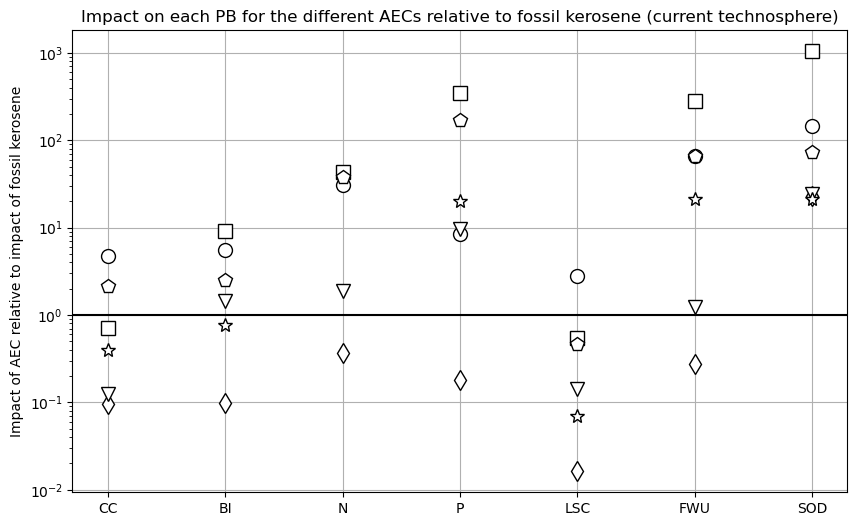

In [337]:
plt.figure(figsize=(10, 6))
fuel_names=['PtLWG', 'Bioresidues','Bioproducts','PtL-D','BioHEFARS','LH2']
symbols = {'PtLWG': 'o', 'PtL-D':'*','Bioresidues': 'd', 
           'Bioproducts':'v',
            'BioHEFARS':'s','LH2':'p'}
# Change the order of the PB: CC, BI, N, P, LSC, FWU; SOD
PB_stat=['RFtotal', 'BIItotal', 'N','P', 'LSC', 'FWU','O3']
names=['CC','BI','N','P', 'LSC', 'FWU','SOD']
for PB in PB_stat:
    for fuel in fuel_names:
        plt.plot(PB, aviation_2022[fuel]['ratioFK'][PB], marker=symbols[fuel], markersize=10, label=fuel, color="white", markeredgecolor='black')


plt.yscale('log')
plt.axhline(y=1, color='black', linestyle='-')
plt.grid()
plt.xticks(PB_stat, names)
plt.ylabel('Impact of AEC relative to impact of fossil kerosene')
plt.title('Impact on each PB for the different AECs relative to fossil kerosene (current technosphere)')


# Figure 3

In [338]:
data_fig2=pd.DataFrame()
combinaisons = [
    ('100FK', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F1', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F2', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F3', 'PtLWG', 'Biofuelsmix-FT'),
    ('Refuel_EU type', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-HEFA'),
    ('0FK_PtL', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_PtL', 'PtL-D', 'Biofuelsmix-FT')
]

scenarios_fig2=['FK','ICAO-F1','ICAO-F2','ICAO-F3','Refuel-EU','Bio-FT','Bio-HEFA','PtL-grid','PtL-RES']
data_fig2['scenario']=pd.DataFrame(scenarios_fig2)

LSC_historique = [historical_fossil_kerosene()*dictionnaire_EF['FK']['LSC'][0]/PB_aviation['FHN']['LSC']] * 9
BII_CC_historique=[(historical_rf_2019_2022+historical_rf_2018)*CF_BII_climate/PB_aviation['FHN']['BIICC']]*9
RF_historique=[(historical_rf_2019_2022+historical_rf_2018)/PB_aviation['FHN']['RFtotal']]*9
PPM_historique=[(historical_ppm_2019_2022+historical_ppm_2018)/PB_aviation['FHN']['PPMtotal']]*9
data_fig2['LSCcumul_historique']=pd.DataFrame(LSC_historique)
data_fig2['BIItotal_historique']=pd.DataFrame(BII_CC_historique)
data_fig2['RFtotal_historique']=pd.DataFrame(RF_historique)
data_fig2['PPMtotal_historique']=pd.DataFrame(PPM_historique)

# Browse the categories and add the corresponding values to each column of the DataFrame
for PB in PBs:
    for categorie in fuel_categories:
        values = []
        lsccumuls=[]
        for nom, ptl, bio in combinaisons:
            value = None
            if nom in dictionnaire_AESA and ptl in dictionnaire_AESA[nom] and bio in dictionnaire_AESA[nom][ptl]:
                value = dictionnaire_AESA[nom][ptl][bio][categorie]['FHN'][PB][27]
            values.append(value)
            lsccumul=sum(dictionnaire_AESA[nom][ptl][bio][categorie]['FHN']['LSC'])
            lsccumuls.append(lsccumul)
        data_fig2[f'{PB}_{categorie}'] = values
        data_fig2[f'LSCcumul_{categorie}']=lsccumuls

KeyError: 'LSCcumul'

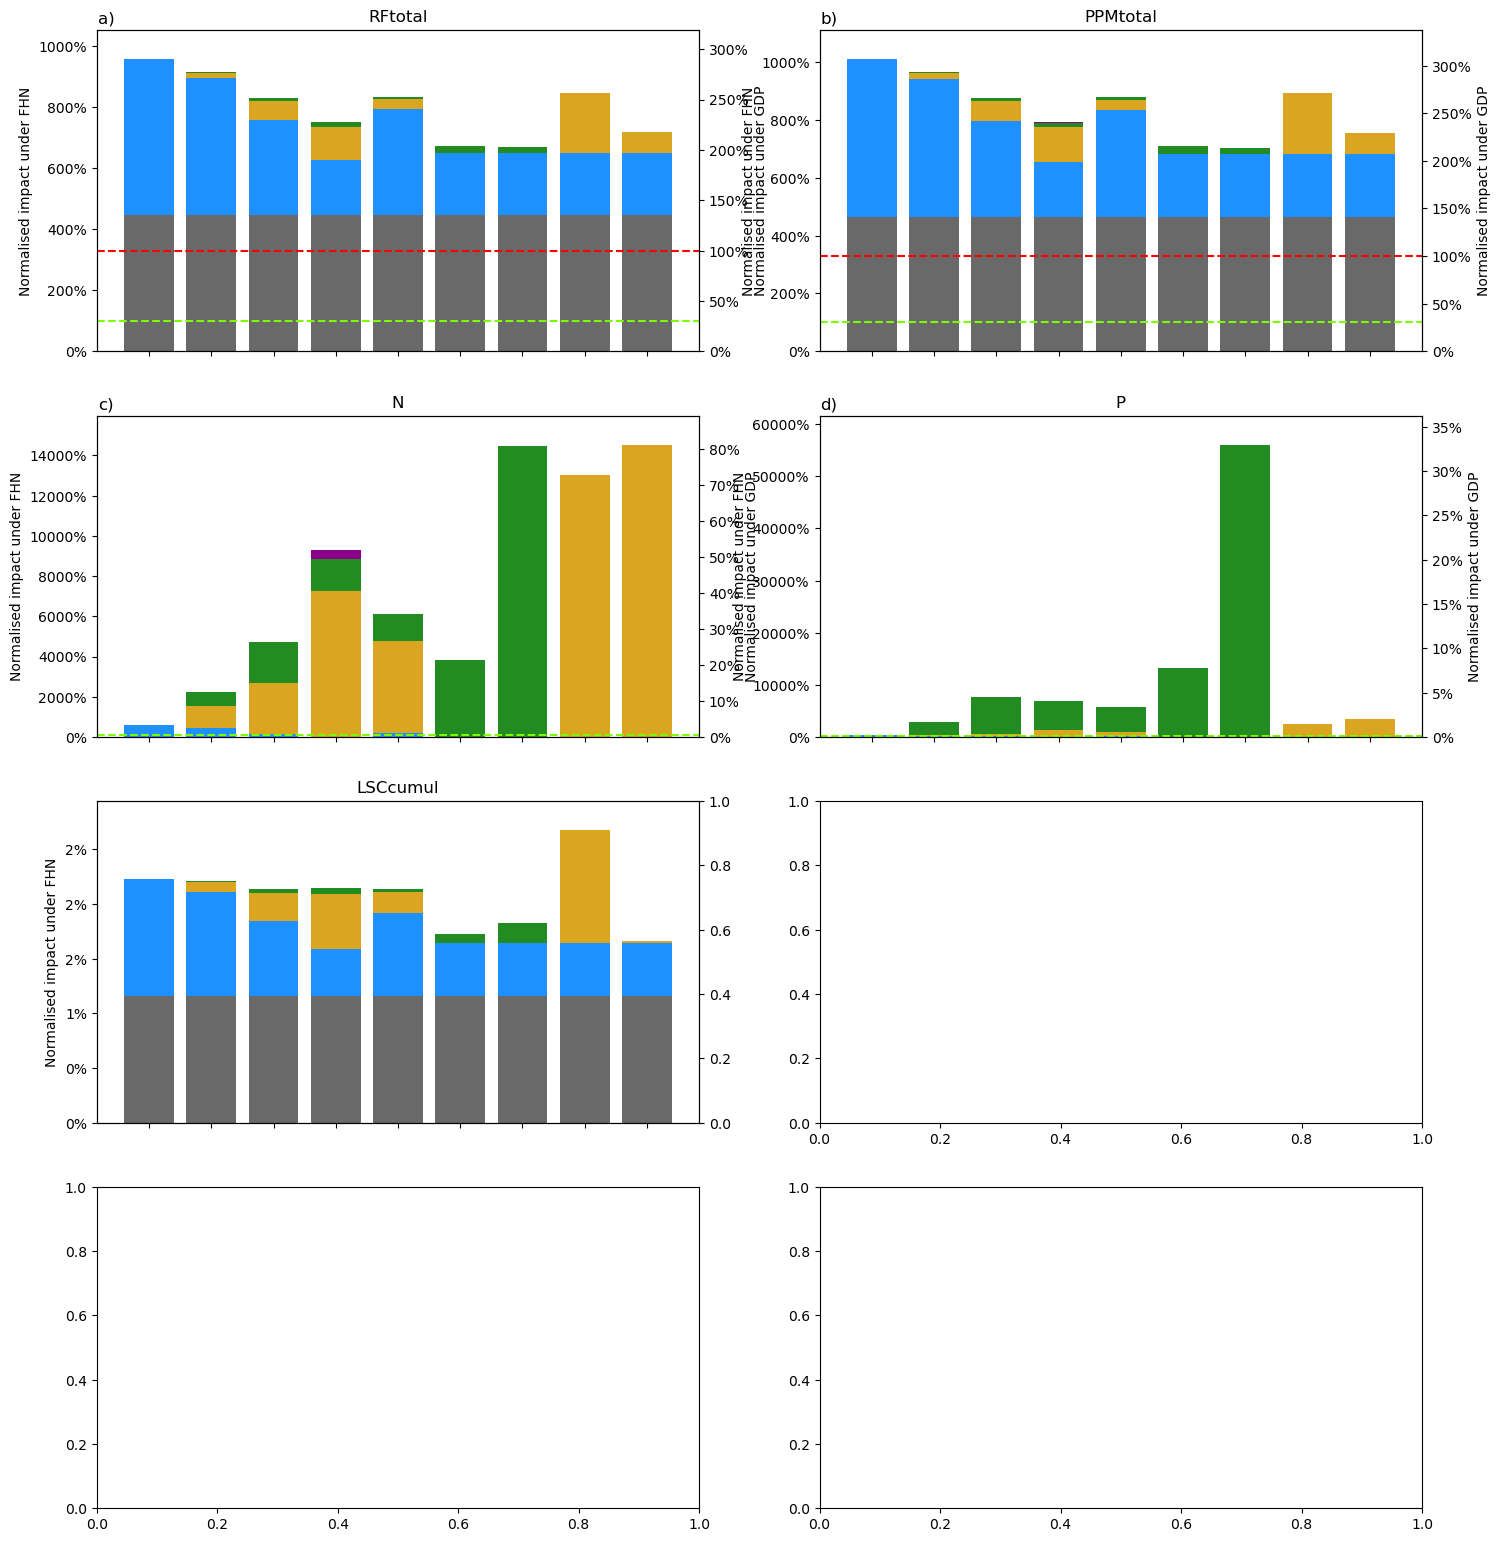

In [339]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Convert the column names to strings
data_fig2.columns = data_fig2.columns.astype(str)

# Arrange the columns in the specified order
ordre_colonnes = ['RFtotal', 'PPMtotal', 'N', 'P', 'LSCcumul', 'FWU', 'O3', 'BIItotal']
couleurs = {
    'historique': 'dimgrey',
    'FK': 'dodgerblue',
    'PtL': 'goldenrod',
    'Bio': 'forestgreen',
    'LH2': 'darkmagenta'
}

fig, axes = plt.subplots(4, 2, figsize=(17.1,19.2))

# Iterate over each group of columns and each axis
for i, pb in enumerate(ordre_colonnes):
    # Calculate the row and column indices for the current subplot
    row = i // 2
    col = i % 2

    # Select the columns whose name before the "_" is the same
    colonnes_groupe = [col for col in data_fig2.columns if col.split('_')[0] == pb]
    valeurs_groupe = data_fig2[colonnes_groupe].values.T  # Transpose to have the values of each column on a row

    ax = axes[row, col]
    bottom = None
    for k, col in enumerate(colonnes_groupe):
        for cle, couleur in couleurs.items():
            if cle in col:
                if bottom is None:
                    bars = ax.bar(data_fig2['scenario'], valeurs_groupe[k], label=col, color=couleur)
                    bottom = valeurs_groupe[k]
                else:
                    bars = ax.bar(data_fig2['scenario'], valeurs_groupe[k], bottom=bottom, label=col, color=couleur)
                    bottom += valeurs_groupe[k]
    ax.set_ylabel('Normalised impact under FHN')
    ax.set_title(f'{pb}')

    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

    if row >= 3:
        ax.set_xticklabels(data_fig2['scenario'], rotation=90)
    else:
        ax.set_xticklabels([])

    ax.set_ylim(top=ax.get_ylim()[1] * 1.1)
    ax2 = ax.twinx()
    # Define the proportionality coefficients for each PB
    coefficient_proportionnalite = PB_aviation['FHN'][pb] / PB_aviation['GDP_without_tourism'][pb]
    # Apply the proportionality coefficient to the scale of the right y-axis
    ax2.set_ylim(ax.get_ylim()[0] * coefficient_proportionnalite, ax.get_ylim()[1] * coefficient_proportionnalite)
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax2.set_ylabel('Normalised impact under GDP')
    ax.axhline(y=1, color='lawngreen', linestyle='--', linewidth=1.5)
    ax2.axhline(y=1, color='red', linestyle='--', linewidth=1.5)
    
    # Add a legend to the subplot
    ax.annotate(f'{chr(97 + i)})', xy=(-0.01, 1.08), xytext=(5, -5), xycoords='axes fraction', textcoords='offset points', ha='left', va='top', fontsize=12)

plt.tight_layout()
plt.show()

# If there is a problem with LSCcumul, change LSC by LSCcumul in PBs and rerun PB_aviation

# Figure 4

#### LCI results

In [340]:
import pandas as pd
df=pd.read_excel(r'D:\b.pais\Documents\Articles\Submit\Supporting code\4_Technosphere_inventory_2050.xlsx')
données_LCI={}

The following code will explore the technosphre inventory to obtain the quantity of each type of electricity production needed by each MJ of fuel

##### Natural gas

In [341]:
for fuels in choix_ptl:
    données_LCI[fuels]={}
    somme=df.loc[df['name'].str.contains(f'electricity production, natural gas'), fuels].sum()
    données_LCI[fuels]['natural gas']=somme
for fuels in choix_bio:
    données_LCI[fuels]={}
    somme=df.loc[df['name'].str.contains(f'electricity production, natural gas'), fuels].sum()
    données_LCI[fuels]['natural gas']=somme
données_LCI['FK']={}
somme=df.loc[df['name'].str.contains(f'electricity production, natural gas'), 'FK'].sum()
données_LCI['FK']['natural gas']=somme
données_LCI['LH2']={}
somme=df.loc[df['name'].str.contains(f'electricity production, natural gas'), 'LH2'].sum()
données_LCI['LH2']['natural gas']=somme
    

##### Nuclear

In [342]:
for fuels in choix_ptl:
    somme=df.loc[df['name'].str.contains(f'electricity production, nuclear'), fuels].sum()
    données_LCI[fuels]['nuclear']=somme
for fuels in choix_bio:
    somme=df.loc[df['name'].str.contains(f'electricity production, nuclear'), fuels].sum()
    données_LCI[fuels]['nuclear']=somme
somme=df.loc[df['name'].str.contains(f'electricity production, nuclear'), 'FK'].sum()
données_LCI['FK']['nuclear']=somme
somme=df.loc[df['name'].str.contains(f'electricity production, nuclear'), 'LH2'].sum()
données_LCI['LH2']['nuclear']=somme

##### Oil

In [343]:
for fuels in choix_ptl:
    somme=df.loc[df['name'].str.contains(f'electricity production, oil'), fuels].sum()
    données_LCI[fuels]['oil']=somme
for fuels in choix_bio:
    somme=df.loc[df['name'].str.contains(f'electricity production, oil'), fuels].sum()
    données_LCI[fuels]['oil']=somme
somme=df.loc[df['name'].str.contains(f'electricity production, oil'), 'FK'].sum()
données_LCI['FK']['oil']=somme
somme=df.loc[df['name'].str.contains(f'electricity production, oil'), 'LH2'].sum()
données_LCI['LH2']['oil']=somme

##### Coal

In [344]:
for fuels in choix_ptl:
    somme=df.loc[df['name'].str.contains(f'electricity production, at hard coal'), fuels].sum()+df.loc[df['name'].str.contains(f'electricity production, coal'), fuels].sum()
    données_LCI[fuels]['coal']=somme
for fuels in choix_bio:
    somme=df.loc[df['name'].str.contains(f'electricity production, at hard coal'), fuels].sum()+df.loc[df['name'].str.contains(f'electricity production, coal'), fuels].sum()
    données_LCI[fuels]['coal']=somme
somme=df.loc[df['name'].str.contains(f'electricity production, at hard coal'), 'FK'].sum()+df.loc[df['name'].str.contains(f'electricity production, coal'), 'FK'].sum()
données_LCI['FK']['coal']=somme
somme=df.loc[df['name'].str.contains(f'electricity production, at hard coal'), 'LH2'].sum()+df.loc[df['name'].str.contains(f'electricity production, coal'), 'LH2'].sum()
données_LCI['LH2']['coal']=somme

##### Wind onshore

In [345]:
for fuels in choix_ptl:
    somme=df.loc[df['name'].str.contains('electricity production, wind', case=False) & df['name'].str.contains('onshore', case=False), fuels].sum()
    données_LCI[fuels]['wind onshore']=somme
for fuels in choix_bio:
    somme=df.loc[df['name'].str.contains('electricity production, wind', case=False) & df['name'].str.contains('onshore', case=False), fuels].sum()
    données_LCI[fuels]['wind onshore']=somme
somme=df.loc[df['name'].str.contains('electricity production, wind', case=False) & df['name'].str.contains('onshore', case=False), 'FK'].sum()
données_LCI['FK']['wind onshore']=somme
somme=df.loc[df['name'].str.contains('electricity production, wind', case=False) & df['name'].str.contains('onshore', case=False), 'LH2'].sum()
données_LCI['LH2']['wind onshore']=somme

##### Wind offshore

In [346]:
for fuels in choix_ptl:
    somme=df.loc[df['name'].str.contains('electricity production, wind', case=False) & df['name'].str.contains('offshore', case=False), fuels].sum()
    données_LCI[fuels]['wind offshore']=somme
for fuels in choix_bio:
    somme=df.loc[df['name'].str.contains('electricity production, wind', case=False) & df['name'].str.contains('offshore', case=False), fuels].sum()
    données_LCI[fuels]['wind offshore']=somme
somme=df.loc[df['name'].str.contains('electricity production, wind', case=False) & df['name'].str.contains('offshore', case=False), 'FK'].sum()
données_LCI['FK']['wind offshore']=somme
somme=df.loc[df['name'].str.contains('electricity production, wind', case=False) & df['name'].str.contains('offshore', case=False), 'LH2'].sum()
données_LCI['LH2']['wind offshore']=somme

##### Photovoltaic

In [347]:
for fuels in choix_ptl:
    somme=df.loc[df['name'].str.contains('electricity production, photovoltaic', case=False), fuels].sum()
    données_LCI[fuels]['photovoltaic']=somme
for fuels in choix_bio:
    somme=df.loc[df['name'].str.contains('electricity production, photovoltaic', case=False), fuels].sum()
    données_LCI[fuels]['photovoltaic']=somme
somme=df.loc[df['name'].str.contains('electricity production, photovoltaic', case=False), 'FK'].sum()
données_LCI['FK']['photovoltaic']=somme
somme=df.loc[df['name'].str.contains('electricity production, photovoltaic', case=False), 'LH2'].sum()
données_LCI['LH2']['photovoltaic']=somme

##### Hydro

In [348]:
for fuels in choix_ptl:
    somme=df.loc[df['name'].str.contains('electricity production, hydro', case=False), fuels].sum()
    données_LCI[fuels]['hydro']=somme
for fuels in choix_bio:
    somme=df.loc[df['name'].str.contains('electricity production, hydro', case=False), fuels].sum()
    données_LCI[fuels]['hydro']=somme
somme=df.loc[df['name'].str.contains('electricity production, hydro', case=False), 'FK'].sum()
données_LCI['FK']['hydro']=somme
somme=df.loc[df['name'].str.contains('electricity production, hydro', case=False), 'LH2'].sum()
données_LCI['LH2']['hydro']=somme

##### Geothermal

In [349]:
for fuels in choix_ptl:
    somme=df.loc[df['name'].str.contains('electricity production, deep geothermal', case=False), fuels].sum()
    données_LCI[fuels]['deep geothermal']=somme
for fuels in choix_bio:
    somme=df.loc[df['name'].str.contains('electricity production, deep geothermal', case=False), fuels].sum()
    données_LCI[fuels]['deep geothermal']=somme
somme=df.loc[df['name'].str.contains('electricity production, deep geothermal', case=False), 'FK'].sum()
données_LCI['FK']['deep geothermal']=somme
somme=df.loc[df['name'].str.contains('electricity production, deep geothermal', case=False), 'LH2'].sum()
données_LCI['LH2']['deep geothermal']=somme

##### Biomass

In [350]:
for fuels in choix_ptl:
    somme=df.loc[df['name'].str.contains('electricity production, at biomass', case=False), fuels].sum()
    données_LCI[fuels]['biomass']=somme
for fuels in choix_bio:
    somme=df.loc[df['name'].str.contains('electricity production, at biomass', case=False), fuels].sum()
    données_LCI[fuels]['biomass']=somme
somme=df.loc[df['name'].str.contains('electricity production, at biomass', case=False), 'FK'].sum()
données_LCI['FK']['biomass']=somme
somme=df.loc[df['name'].str.contains('electricity production, at biomass', case=False), 'LH2'].sum()
données_LCI['LH2']['biomass']=somme

##### Solar

In [351]:
for fuels in choix_ptl:
    somme=df.loc[df['name'].str.contains('electricity production, solar', case=False), fuels].sum()
    données_LCI[fuels]['solar']=somme
for fuels in choix_bio:
    somme=df.loc[df['name'].str.contains('electricity production, solar', case=False), fuels].sum()
    données_LCI[fuels]['solar']=somme
somme=df.loc[df['name'].str.contains('electricity production, solar', case=False), 'FK'].sum()
données_LCI['FK']['solar']=somme
somme=df.loc[df['name'].str.contains('electricity production, solar', case=False), 'LH2'].sum()
données_LCI['LH2']['solar']=somme

##### Lignite

In [352]:
for fuels in choix_ptl:
    somme=df.loc[df['name'].str.contains('electricity production, at lignite|electricity production, lignite', case=False), fuels].sum()
    données_LCI[fuels]['lignite']=somme
for fuels in choix_bio:
    somme=df.loc[df['name'].str.contains('electricity production, at lignite|electricity production, lignite', case=False), fuels].sum()
    données_LCI[fuels]['lignite']=somme
somme=df.loc[df['name'].str.contains('electricity production, at lignite|electricity production, lignite', case=False), 'FK'].sum()
données_LCI['FK']['lignite']=somme
somme=df.loc[df['name'].str.contains('electricity production, at lignite|electricity production, lignite', case=False), 'LH2'].sum()
données_LCI['LH2']['lignite']=somme

## 4.a Electricity and biomass

### Electricity

In [353]:
dict_electricity={}
#kWh per MJ
dict_electricity['EF']={}
dict_electricity['EF']['FK']=sum(données_LCI['FK'].values())
dict_electricity['EF']['LH2']=sum(données_LCI['LH2'].values())
dict_electricity['EF']['PtL-D']=sum(données_LCI['PtL-D'].values())
dict_electricity['EF']['PtLWG']=sum(données_LCI['PtLWG'].values())
dict_electricity['EF']['Biofuelsmix-FT']=sum(données_LCI['Biofuelsmix-FT'].values())
dict_electricity['EF']['Biofuelsmix-HEFA']=sum(données_LCI['Biofuelsmix-HEFA'].values())

In [355]:
combinaisons_a_afficher = [
    ('100FK', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F1', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F2', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F3', 'PtLWG', 'Biofuelsmix-FT'),
    ('Refuel_EU type', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-HEFA'),
    ('0FK_PtL', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_PtL', 'PtL-D', 'Biofuelsmix-FT')
]
for (nom,ptl,bio) in combinaisons_a_afficher:
    if nom not in dict_electricity:
        dict_electricity[nom]={}
    if ptl not in dict_electricity[nom]:
        dict_electricity[nom][ptl]={}
    if bio not in dict_electricity[nom][ptl]:
        dict_electricity[nom][ptl][bio]={}
    demande_fk=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[0]
    demande_ptl=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[1]
    demande_bio=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[2]
    demande_lh2=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[3]
    dict_electricity[nom][ptl][bio]=demande_bio[27]*dict_electricity['EF'][bio]+demande_ptl[27]*dict_electricity['EF'][ptl]+demande_fk[27]*dict_electricity['EF']['FK']

### Biomass

In [356]:
def mj_biomasse_per_mj_fuel(calorific_value, kgbio_per_kg_fuel, mj_per_kg_fuel):
    return calorific_value * kgbio_per_kg_fuel / mj_per_kg_fuel

In [357]:
dict_biomass={}
#Calorific values of the feedstocks
dict_biomass['calorific value']={}
dict_biomass['calorific value']['BioHEFARS']=37.62
dict_biomass['calorific value']['Bioresidues']=15.78
dict_biomass['calorific value']['Bioproducts']=19

#Kg feedstocks per kg fuel
dict_biomass['kg feedstocks per kg fuel']={}
dict_biomass['kg feedstocks per kg fuel']['BioHEFARS']=1.0246*1.35*0.92121
dict_biomass['kg feedstocks per kg fuel']['Bioresidues']=1.006*1.9402
dict_biomass['kg feedstocks per kg fuel']['Bioproducts']=1.006*1.9402               

#Kg fuel per MJ
dict_biomass['MJ per kg fuel']={}
dict_biomass['MJ per kg fuel']['BioHEFARS']=43.15
dict_biomass['MJ per kg fuel']['Bioresidues']=43.15
dict_biomass['MJ per kg fuel']['Bioproducts']=43.15


In [358]:
liste_biokerosene=['BioHEFARS','Bioresidues','Bioproducts']
for bio in liste_biokerosene:
    dict_biomass[bio]=mj_biomasse_per_mj_fuel(dict_biomass['calorific value'][bio], dict_biomass['kg feedstocks per kg fuel'][bio], dict_biomass['MJ per kg fuel'][bio])

In [359]:
dict_biomass['Biofuelsmix-FT']=dict_biomass['BioHEFARS']*0.15+dict_biomass['Bioresidues']*0.425+dict_biomass['Bioproducts']*0.425
dict_biomass['Biofuelsmix-HEFA']=dict_biomass['BioHEFARS']*0.7+dict_biomass['Bioresidues']*0.15+dict_biomass['Bioproducts']*0.15

In [360]:
combinaisons_a_afficher = [
       ('100FK', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F1', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F2', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F3', 'PtLWG', 'Biofuelsmix-FT'),
    ('Refuel_EU type', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-HEFA'),
    ('0FK_PtL', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_PtL', 'PtL-D', 'Biofuelsmix-FT')
]

for (nom,ptl,bio) in combinaisons_a_afficher:
    if nom not in dict_biomass:
        dict_biomass[nom]={}
    if ptl not in dict_biomass[nom]:
        dict_biomass[nom][ptl]={}
    if bio not in dict_biomass[nom][ptl]:
        dict_biomass[nom][ptl][bio]={}
    demande_bio=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[2]
    liste_biokerosene=['BioHEFARS','Biofuelsmix-FT','Biofuelsmix-HEFA']
    for bio in liste_biokerosene:
        dict_biomass[nom][ptl][bio]=demande_bio[27]*dict_biomass[bio]


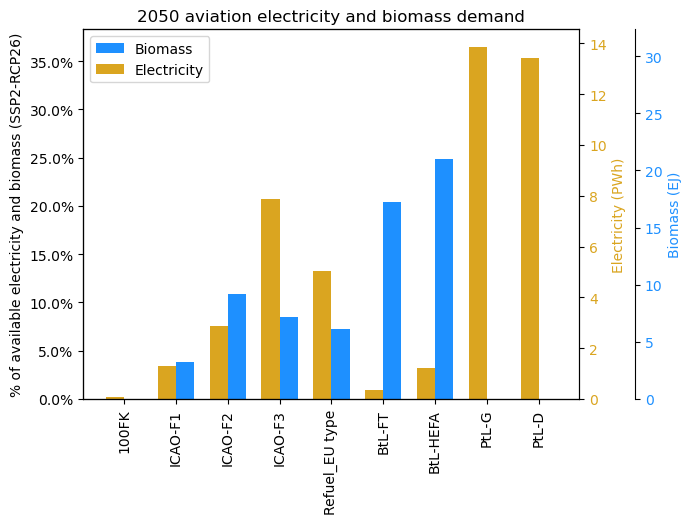

In [361]:
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
fig, ax = plt.subplots()
scenarios_fig4=['100FK', 'ICAO-F1', 'ICAO-F2', 'ICAO-F3', 'Refuel_EU type','BtL-FT','BtL-HEFA','PtL-G','PtL-D']
barreselec=[]
barresbiomasse=[]
barwidth=0.35
indices=np.arange(len(scenarios_fig4))
for (nom,ptl,bio) in combinaisons_a_afficher:
    barresbiomasse.append(100*dict_biomass[nom][ptl][bio]*1e-12/84.471)
    barreselec.append(100*dict_electricity[nom][ptl][bio]*3.6e-12/136.793)
ax.bar(indices+barwidth/2,barresbiomasse,color='dodgerblue',width=barwidth, label='Biomass')
ax.bar(indices-barwidth/2,barreselec,color='goldenrod',width=barwidth, label='Electricity')
ax.set_xticks(indices, scenarios_fig4, rotation=90)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of available electricity and biomass (SSP2-RCP26)')

ax2=ax.twinx()
ax2.set_ylim(ax.get_ylim()[0]*136.793/360,ax.get_ylim()[1]*136.793/360)
ax2.set_ylabel('Electricity (PWh)', color='goldenrod')
ax2.tick_params(axis='y', labelcolor='goldenrod')

# Trace la troisième série de données sur le troisième axe y
ax3=ax.twinx()
ax3.set_ylabel('Biomass (EJ)', color='dodgerblue')
ax3.set_ylim(ax.get_ylim()[0]*84.471/100,ax.get_ylim()[1]*84.471/100)
ax3.tick_params(axis='y', labelcolor='dodgerblue', direction='out')
ax3.yaxis.set_ticks_position('right')


#ax2.spines['right'].set_position(('outward', 40))  # Décalage vers la droite
ax3.spines['right'].set_position(('outward', 40))  # Décalage supplémentaire
ax.legend()
plt.title('2050 aviation electricity and biomass demand')
plt.show()

## 4.b Land occupation

### Power flux density
Source: van Zalk and Behrens, 2018, "The spatial extent of renewable and non-renewable power generation: A review and meta-analysis of power densities and their application in the U.S.", Energy Policy
https://doi.org/10.1016/j.enpol.2018.08.02\
Mean values

In [362]:
heures_par_an=365*24
twh_an_mw=1e6/heures_par_an
built_up_land_cover_2050=132.67*1e4 #Mha*1e4=km2 Source: SSP Database
cropland_and_energy_crops_land_cover_2050=1957.24*1e4 #Mha*1e4=km2 Source: SSP Database 

### Biomass surface yield

In [363]:
def t_per_ha_to_kg_per_km2(value):
    return value*1e5


In [364]:
wood_average_density=600 #kg/m3 (dry matter per cubic meter)
forest_volume_productivity=4.6 #m3/ha/yr Source: https://www.sciencedirect.com/science/article/pii/S0378112715003473
forest_mass_productivity=wood_average_density*forest_volume_productivity #kg/ha/yr
rapeseed_oil_yield=0.73 #t/ha/yr Source: FAO and https://ourworldindata.org/grapher/oil-yield-by-crop


In [365]:
#Expressed in kg/m²
biomass={}
biomass['BioHEFARS']=t_per_ha_to_kg_per_km2(rapeseed_oil_yield)
biomass['HEFAUCOmix']=0
biomass['forest_products']=100*forest_mass_productivity
biomass['FTmix']=biomass['forest_products']/2

In [366]:
kg_oil_per_mj_HEFA=0.028377
kg_chips_per_mj_FT=0.04523386

### Results

#### Electricity

In [367]:
land_occupation={}
land_occupation['EF']={}
choix_fuel=['FK','PtLWG','PtL-D','Biofuelsmix-FT','Biofuelsmix-HEFA','LH2']
for fuels in choix_fuel:
    land_occupation['EF'][fuels]={}
    somme=0
    for keys in densite_surfacique_puissance:
        somme=somme+données_LCI[fuels][keys]*1e-9*(twh_an_mw/densite_surfacique_puissance[keys])
    land_occupation['EF'][fuels]=somme

In [368]:
combinaisons_a_afficher = [
       ('100FK', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F1', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F2', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F3', 'PtLWG', 'Biofuelsmix-FT'),
    ('Refuel_EU type', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-HEFA'),
    ('0FK_PtL', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_PtL', 'PtL-D', 'Biofuelsmix-FT')
]
fuel_categories=['FK', 'PtL', 'Bio', 'LH2']
for (nom,ptl,bio) in combinaisons_a_afficher:
    if nom not in land_occupation:
        land_occupation[nom]={}
    if ptl not in land_occupation[nom]:
        land_occupation[nom][ptl]={}
    if bio not in land_occupation[nom][ptl]:
        land_occupation[nom][ptl][bio]={}
    demande_LH2=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[3]
    demande_FK=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[0]
    demande_ptl=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[1]
    demande_bio=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[2]
    for categorie in fuel_categories:
        if categorie not in land_occupation[nom][ptl][bio]:
            land_occupation[nom][ptl][bio][categorie]={}
        if categorie=='FK':
            land_occupation[nom][ptl][bio][categorie]=demande_FK[27]*land_occupation['EF']['FK']
        if categorie=='LH2':
            land_occupation[nom][ptl][bio][categorie]=demande_LH2[27]*land_occupation['EF']['LH2']
        if categorie=='PtL':
            land_occupation[nom][ptl][bio][categorie]=demande_ptl[27]*land_occupation['EF'][ptl]
        if categorie=='Bio':
            land_occupation[nom][ptl][bio][categorie]=demande_bio[27]*land_occupation['EF'][bio]

C:\Users\ba.pais\AppData\Local\Temp\ipykernel_9496\3046570681.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(scenarios_fig4, rotation=90)


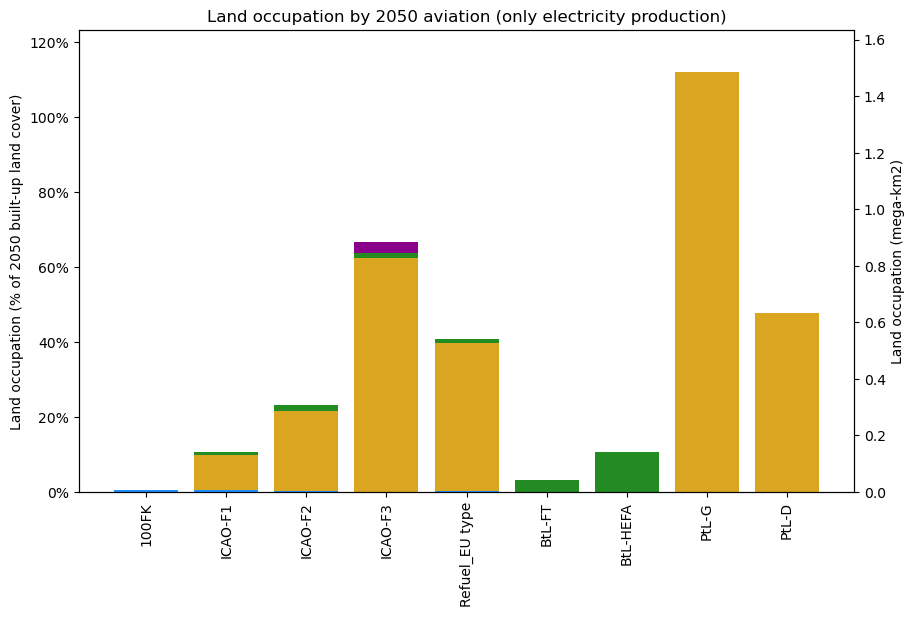

In [369]:
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
fig, ax=plt.subplots(figsize=(10, 6))
scenarios_fig4=['100FK', 'ICAO-F1', 'ICAO-F2', 'ICAO-F3', 'Refuel_EU type','BtL-FT','BtL-HEFA','PtL-G','PtL-D']

for (nom,ptl,bio) in combinaisons_a_afficher:
    for categorie in fuel_categories:
        if categorie=='FK':
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation[nom][ptl][bio][categorie]/built_up_land_cover_2050, color='dodgerblue')
        if categorie=='PtL':
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation[nom][ptl][bio][categorie]/built_up_land_cover_2050, bottom=100*land_occupation[nom][ptl][bio]['FK']/built_up_land_cover_2050,color='goldenrod')
        if categorie=='Bio':
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation[nom][ptl][bio][categorie]/built_up_land_cover_2050, bottom=100*(land_occupation[nom][ptl][bio]['FK']+land_occupation[nom][ptl][bio]['PtL'])/built_up_land_cover_2050,color='forestgreen')
        if categorie=='LH2':
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation[nom][ptl][bio][categorie]/built_up_land_cover_2050, bottom=100*(land_occupation[nom][ptl][bio]['FK']+land_occupation[nom][ptl][bio]['PtL']+land_occupation[nom][ptl][bio]['Bio'])/built_up_land_cover_2050,color='darkmagenta')
ax.set_xticklabels(scenarios_fig4, rotation=90)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,ax.get_ylim()[1]*1.1)
ax2=ax.twinx()
ax2.set_ylim(1e-6*ax.get_ylim()[0]*built_up_land_cover_2050/100,1e-6*ax.get_ylim()[1]*built_up_land_cover_2050/100)
ax2.set_ylabel('Land occupation (mega-km2)')
ax.set_ylabel('Land occupation (% of 2050 built-up land cover)')
plt.title('Land occupation by 2050 aviation (only electricity production)')
plt.show()

#### Biomass

In [370]:
land_occupation_biomass={}
land_occupation_biomass['EF']={}
land_occupation_biomass['EF']['BioHEFARS']=kg_oil_per_mj_HEFA/biomass['BioHEFARS']
land_occupation_biomass['EF']['Bioproducts']=kg_chips_per_mj_FT/biomass['forest_products']
land_occupation_biomass['EF']['Bioresidues']=0
land_occupation_biomass['EF']['Biofuelsmix-FT']=0.85*kg_chips_per_mj_FT/biomass['FTmix']+0.15*kg_oil_per_mj_HEFA/biomass['BioHEFARS']
land_occupation_biomass['EF']['Biofuelsmix-HEFA']=0.7*kg_oil_per_mj_HEFA/biomass['BioHEFARS']+0.3*kg_chips_per_mj_FT/biomass['FTmix']
land_occupation_biomass['EF']['HEFAUCOmix']=0

In [371]:
combinaisons_a_afficher = [
       ('100FK', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F1', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F2', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F3', 'PtLWG', 'Biofuelsmix-FT'),
    ('Refuel_EU type', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-HEFA'),
    ('0FK_PtL', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_PtL', 'PtL-D', 'Biofuelsmix-FT')
]
fuel_categories=['FK', 'PtL', 'Bio', 'LH2']
for (nom,ptl,bio) in combinaisons_a_afficher:
    if nom not in land_occupation_biomass:
        land_occupation_biomass[nom]={}
    if ptl not in land_occupation_biomass[nom]:
        land_occupation_biomass[nom][ptl]={}
    if bio not in land_occupation_biomass[nom][ptl]:
        land_occupation_biomass[nom][ptl][bio]={}
    demande_LH2=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[3]
    demande_FK=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[0]
    demande_ptl=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[1]
    demande_bio=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[2]
    for categorie in fuel_categories:
        if categorie not in land_occupation_biomass[nom][ptl][bio]:
            land_occupation_biomass[nom][ptl][bio][categorie]={}
        if categorie=='FK':
            land_occupation_biomass[nom][ptl][bio][categorie]=0
        if categorie=='LH2':
            land_occupation_biomass[nom][ptl][bio][categorie]=0
        if categorie=='PtL':
            land_occupation_biomass[nom][ptl][bio][categorie]=0
        if categorie=='Bio':
            land_occupation_biomass[nom][ptl][bio][categorie]=demande_bio[27]*land_occupation_biomass['EF'][bio]

C:\Users\ba.pais\AppData\Local\Temp\ipykernel_9496\2317684350.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(scenarios_fig4, rotation=90)


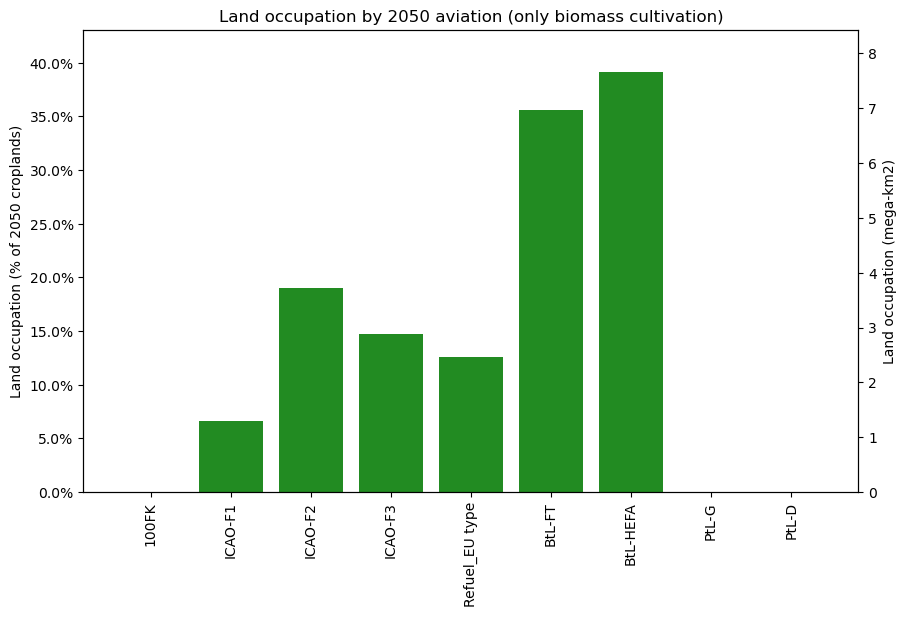

In [372]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
fig, ax=plt.subplots(figsize=(10, 6))
scenarios_fig4=['100FK', 'ICAO-F1', 'ICAO-F2', 'ICAO-F3', 'Refuel_EU type','BtL-FT','BtL-HEFA','PtL-G','PtL-D']

for (nom,ptl,bio) in combinaisons_a_afficher:
    for categorie in fuel_categories:
        if categorie=='FK':
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation_biomass[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050, color='dodgerblue')
        if categorie=='PtL':
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation_biomass[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050, bottom=100*land_occupation_biomass[nom][ptl][bio]['FK']/cropland_and_energy_crops_land_cover_2050,color='goldenrod')
        if categorie=='Bio':
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation_biomass[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050, bottom=100*(land_occupation_biomass[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['PtL'])/cropland_and_energy_crops_land_cover_2050,color='forestgreen')
        if categorie=='LH2':
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation_biomass[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050, bottom=100*(land_occupation_biomass[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['PtL']+land_occupation_biomass[nom][ptl][bio]['Bio'])/cropland_and_energy_crops_land_cover_2050,color='darkmagenta')
ax.set_xticklabels(scenarios_fig4, rotation=90)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,ax.get_ylim()[1]*1.1)
ax2=ax.twinx()
ax2.set_ylim(1e-6*ax.get_ylim()[0]*cropland_and_energy_crops_land_cover_2050/100,1e-6*ax.get_ylim()[1]*cropland_and_energy_crops_land_cover_2050/100)
ax2.set_ylabel('Land occupation (mega-km2)')
ax.set_ylabel('Land occupation (% of 2050 croplands)')
plt.title('Land occupation by 2050 aviation (only biomass cultivation)')
plt.show()

#### Total

C:\Users\ba.pais\AppData\Local\Temp\ipykernel_9496\3985089938.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(scenarios_fig4, rotation=90)


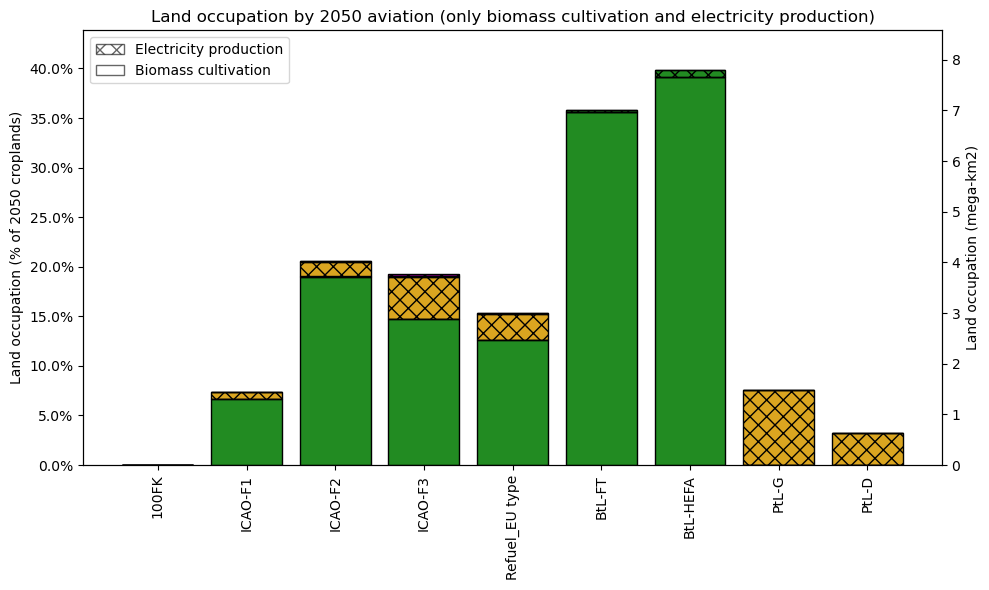

In [373]:
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
fig, ax=plt.subplots(figsize=(10, 6))
scenarios_fig4=['100FK', 'ICAO-F1', 'ICAO-F2', 'ICAO-F3', 'Refuel_EU type','BtL-FT','BtL-HEFA','PtL-G','PtL-D']

for (nom,ptl,bio) in combinaisons_a_afficher:
    for categorie in fuel_categories:
        if categorie=='FK':
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation_biomass[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050, edgecolor='black',color='dodgerblue')
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050,bottom=100*(land_occupation_biomass[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['PtL']+land_occupation_biomass[nom][ptl][bio]['Bio']+land_occupation_biomass[nom][ptl][bio]['LH2'])/cropland_and_energy_crops_land_cover_2050, facecolor='dodgerblue',edgecolor='black', hatch='xx')
        if categorie=='PtL':
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation_biomass[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050, bottom=100*land_occupation_biomass[nom][ptl][bio]['FK']/cropland_and_energy_crops_land_cover_2050,edgecolor='black',color='goldenrod')
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050,bottom=100*(land_occupation[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['PtL']+land_occupation_biomass[nom][ptl][bio]['Bio']+land_occupation_biomass[nom][ptl][bio]['LH2'])/cropland_and_energy_crops_land_cover_2050, facecolor='goldenrod',edgecolor='black', hatch='xx')
        if categorie=='Bio':
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation_biomass[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050, bottom=100*(land_occupation_biomass[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['PtL'])/cropland_and_energy_crops_land_cover_2050,edgecolor='black',color='forestgreen')
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050,bottom=100*(land_occupation[nom][ptl][bio]['FK']+land_occupation[nom][ptl][bio]['PtL']+land_occupation_biomass[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['PtL']+land_occupation_biomass[nom][ptl][bio]['Bio']+land_occupation_biomass[nom][ptl][bio]['LH2'])/cropland_and_energy_crops_land_cover_2050, edgecolor='black',color='forestgreen', hatch='xx')
        if categorie=='LH2':
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation_biomass[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050, bottom=100*(land_occupation_biomass[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['PtL']+land_occupation_biomass[nom][ptl][bio]['Bio'])/cropland_and_energy_crops_land_cover_2050,edgecolor='black',color='darkmagenta')
            ax.bar(f'{nom}_{ptl}_{bio}',100*land_occupation[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050,bottom=100*(land_occupation[nom][ptl][bio]['FK']+land_occupation[nom][ptl][bio]['PtL']+land_occupation[nom][ptl][bio]['Bio']+land_occupation_biomass[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['PtL']+land_occupation_biomass[nom][ptl][bio]['Bio']+land_occupation_biomass[nom][ptl][bio]['LH2'])/cropland_and_energy_crops_land_cover_2050, edgecolor='black',color='darkmagenta', hatch='xx')
ax.set_xticklabels(scenarios_fig4, rotation=90)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0,ax.get_ylim()[1]*1.1)
ax2=ax.twinx()
ax2.set_ylim(1e-6*ax.get_ylim()[0]*cropland_and_energy_crops_land_cover_2050/100,1e-6*ax.get_ylim()[1]*cropland_and_energy_crops_land_cover_2050/100)
ax2.set_ylabel('Land occupation (mega-km2)')
ax.set_ylabel('Land occupation (% of 2050 croplands)')
plt.title('Land occupation by 2050 aviation (only biomass cultivation and electricity production)')

a_val = 0.6
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'xx',label='Electricity production',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='',label='Biomass cultivation', edgecolor='black')

ax.legend(handles = [circ1,circ2],loc=2)
plt.tight_layout()
plt.show()

## 4.c Freshwater withdrawal

% of 2050 industrial freshwater withdrawal following SSP2 (GCAM)

In [374]:
industrial_water_withdrawal_2050=566 #km3 for electricity generation Source: http://dx.doi.org/10.1029/2018WR023452
irrigation_water_withdrawal_2050=3450

In [375]:
data_fw_withdrawal=pd.read_excel(r'D:\b.pais\Documents\Articles\Submit\Supporting code\3_Freshwater_withdrawal_per_MJ_2050.xlsx')
freshwater_withdrawal={}
freshwater_withdrawal['EF']={}
for colonne in data_fw_withdrawal.columns:
    nom_fuel = colonne.split('_')[1] 
    donnee = data_fw_withdrawal[colonne][0]
    if nom_fuel not in freshwater_withdrawal:
        freshwater_withdrawal['EF'][nom_fuel]={}  
    freshwater_withdrawal['EF'][nom_fuel]=donnee

In [376]:
combinaisons_a_afficher = [
       ('100FK', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F1', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F2', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F3', 'PtLWG', 'Biofuelsmix-FT'),
    ('Refuel_EU type', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-HEFA'),
    ('0FK_PtL', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_PtL', 'PtL-D', 'Biofuelsmix-FT')
]
fuel_categories=['FK', 'PtL', 'Bio', 'LH2']

for (nom,ptl,bio) in combinaisons_a_afficher:
    if nom not in freshwater_withdrawal:
        freshwater_withdrawal[nom]={}
    if ptl not in freshwater_withdrawal[nom]:
        freshwater_withdrawal[nom][ptl]={}
    if bio not in freshwater_withdrawal[nom][ptl]:
        freshwater_withdrawal[nom][ptl][bio]={}
    demande_LH2=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[3]
    demande_FK=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[0]
    demande_ptl=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[1]
    demande_bio=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[2]
    for categorie in fuel_categories:
        if categorie not in freshwater_withdrawal[nom][ptl][bio]:
            freshwater_withdrawal[nom][ptl][bio][categorie]={}
        if categorie=='FK':
            freshwater_withdrawal[nom][ptl][bio][categorie]=demande_FK[27]*freshwater_withdrawal['EF']['FK']
        if categorie=='LH2':
            freshwater_withdrawal[nom][ptl][bio][categorie]=demande_LH2[27]*freshwater_withdrawal['EF']['LH2']
        if categorie=='PtL':
            freshwater_withdrawal[nom][ptl][bio][categorie]=demande_ptl[27]*freshwater_withdrawal['EF'][ptl]
        if categorie=='Bio':
            freshwater_withdrawal[nom][ptl][bio][categorie]=demande_bio[27]*freshwater_withdrawal['EF'][bio]


C:\Users\ba.pais\AppData\Local\Temp\ipykernel_9496\4048685492.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(scenarios_fig4, rotation=90)


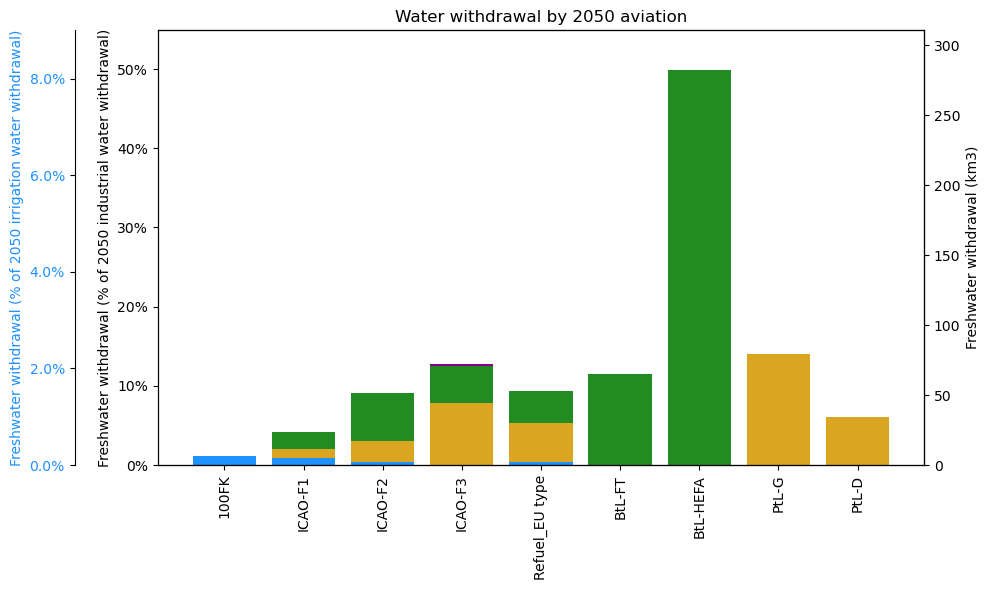

In [377]:
import matplotlib.ticker as mtick
fig, ax=plt.subplots(figsize=(10, 6))
scenarios_fig4=['100FK', 'ICAO-F1', 'ICAO-F2', 'ICAO-F3', 'Refuel_EU type','BtL-FT','BtL-HEFA','PtL-G','PtL-D']

for (nom,ptl,bio) in combinaisons_a_afficher:
    for categorie in fuel_categories:
        if categorie=='FK':
            ax.bar(f'{nom}_{ptl}_{bio}',100*freshwater_withdrawal[nom][ptl][bio][categorie]/industrial_water_withdrawal_2050, color='dodgerblue')
        if categorie=='PtL':
            ax.bar(f'{nom}_{ptl}_{bio}',100*freshwater_withdrawal[nom][ptl][bio][categorie]/industrial_water_withdrawal_2050, bottom=100*(freshwater_withdrawal[nom][ptl][bio]['FK'])/industrial_water_withdrawal_2050,color='goldenrod')
        if categorie=='Bio':
            ax.bar(f'{nom}_{ptl}_{bio}',100*freshwater_withdrawal[nom][ptl][bio][categorie]/industrial_water_withdrawal_2050, bottom=100*(freshwater_withdrawal[nom][ptl][bio]['FK']+freshwater_withdrawal[nom][ptl][bio]['PtL'])/industrial_water_withdrawal_2050,color='forestgreen')
        if categorie=='LH2':
            ax.bar(f'{nom}_{ptl}_{bio}',100*freshwater_withdrawal[nom][ptl][bio][categorie]/industrial_water_withdrawal_2050, bottom=100*(freshwater_withdrawal[nom][ptl][bio]['FK']+freshwater_withdrawal[nom][ptl][bio]['PtL']+freshwater_withdrawal[nom][ptl][bio]['Bio'])/industrial_water_withdrawal_2050,color='darkmagenta')
ax.set_xticklabels(scenarios_fig4, rotation=90)
ax.set_ylim(0,ax.get_ylim()[1]*1.1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2=ax.twinx()
ax2.set_ylim(ax.get_ylim()[0]*industrial_water_withdrawal_2050/100,ax.get_ylim()[1]*industrial_water_withdrawal_2050/100)
ax2.set_ylabel('Freshwater withdrawal (km3)')
ax.set_ylabel('Freshwater withdrawal (% of 2050 industrial water withdrawal)')

# Trace la troisième série de données sur le troisième axe y
ax3=ax.twinx()
ax3.set_ylabel('Freshwater withdrawal (% of 2050 irrigation water withdrawal)', color='dodgerblue')
ax3.set_ylim(ax.get_ylim()[0]*industrial_water_withdrawal_2050/irrigation_water_withdrawal_2050,ax.get_ylim()[1]*industrial_water_withdrawal_2050/irrigation_water_withdrawal_2050)
ax3.tick_params(axis='y', labelcolor='dodgerblue', direction='out')
ax3.yaxis.set_ticks_position('left')
ax3.yaxis.set_label_position('left')
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())


#ax2.spines['right'].set_position(('outward', 40))  # Décalage vers la droite
ax3.spines['left'].set_position(('outward', 60))  # Décalage supplémentaire
plt.title('Water withdrawal by 2050 aviation')
plt.tight_layout()
plt.show()

## 4.g Carbon capture

In [378]:
DAC_per_MJ_PtL=(1/43.15)*1.00057*2.35*0.875*1.57 #Based on the LCI

In [379]:
# Source: Premise documentation
DAC_2050_Remind_SSP2_RCP26=150.8e9
DAC_2050_Remind_SSP1_RCP19=194.87e9
DAC_2050_IMAGE_SSP2_RCP26=0

In [380]:
combinaisons_a_afficher = [('100FK', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F1', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F2', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F3', 'PtLWG', 'Biofuelsmix-FT'),
    ('Refuel_EU type', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-HEFA'),
    ('0FK_PtL', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_PtL', 'PtL-D', 'Biofuelsmix-FT')
]
for (nom,ptl,bio) in combinaisons_a_afficher:
    DAC_annual=1e-9*(demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[1][27]*DAC_per_MJ_PtL)
    print(f'DAC= {DAC_annual} pour {nom}_{ptl}_{bio}')

DAC= 0.0 pour 100FK_PtLWG_Biofuelsmix-FT
DAC= 131.86236086519932 pour ICAO-F1_PtLWG_Biofuelsmix-FT
DAC= 296.622083084114 pour ICAO-F2_PtLWG_Biofuelsmix-FT
DAC= 862.144002960013 pour ICAO-F3_PtLWG_Biofuelsmix-FT
DAC= 546.9971893462915 pour Refuel_EU type_PtLWG_Biofuelsmix-FT
DAC= 0.0 pour 0FK_Bio_PtLWG_Biofuelsmix-FT
DAC= 0.0 pour 0FK_Bio_PtLWG_Biofuelsmix-HEFA
DAC= 1547.9422067024286 pour 0FK_PtL_PtLWG_Biofuelsmix-FT
DAC= 1547.9422067024286 pour 0FK_PtL_PtL-D_Biofuelsmix-FT


Text(0.5, 1.0, 'Direct air capture needed by 2050 aviation')

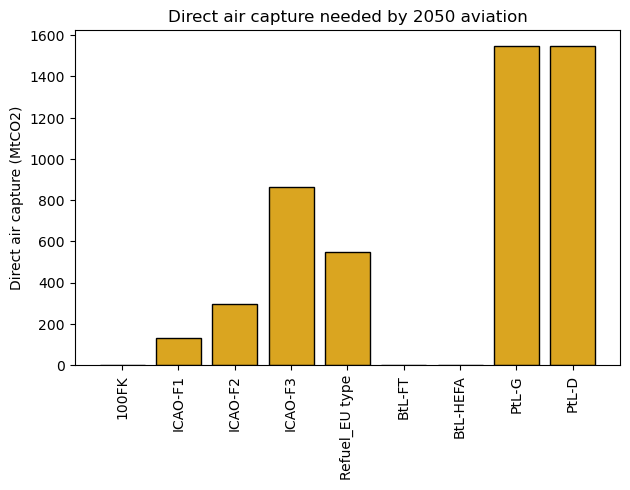

In [381]:
# Figure representing the DAC needed per scenario
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
combinaisons_a_afficher = [('100FK', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F1', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F2', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F3', 'PtLWG', 'Biofuelsmix-FT'),
    ('Refuel_EU type', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-HEFA'),
    ('0FK_PtL', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_PtL', 'PtL-D', 'Biofuelsmix-FT')
]
scenarios_fig4=['100FK', 'ICAO-F1', 'ICAO-F2', 'ICAO-F3', 'Refuel_EU type','BtL-FT','BtL-HEFA','PtL-G','PtL-D'] 
indices=np.arange(len(scenarios_fig4))
for (nom,ptl,bio) in combinaisons_a_afficher:
    DAC_annual=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[1][27]*DAC_per_MJ_PtL*1e-9
    ax.bar(f'{nom}-{ptl}-{bio}',DAC_annual, color='goldenrod', edgecolor='black')
ax.set_xticks(indices, scenarios_fig4, rotation=90)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax2=ax.twinx()
#ax2.set_ylim(1e-9*ax.get_ylim()[0]*DAC_2050_IMAGE_SSP2_RCP26/100,1e-9*ax.get_ylim()[1]*DAC_2050_IMAGE_SSP2_RCP26/100)
#ax2.set_ylabel('Direct air capture (MtCO2)')
#ax.set_ylabel('Direct air capture \n (% of 2050 DACCS in Remind SSP2-RCP2.6)')
ax.set_ylabel('Direct air capture (MtCO2)')
plt.tight_layout()
plt.title('Direct air capture needed by 2050 aviation')


## 4 complete

C:\Users\ba.pais\AppData\Local\Temp\ipykernel_9496\2700062417.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels(scenarios_fig4, rotation=90)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_9496\2700062417.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(scenarios_fig4, rotation=90)


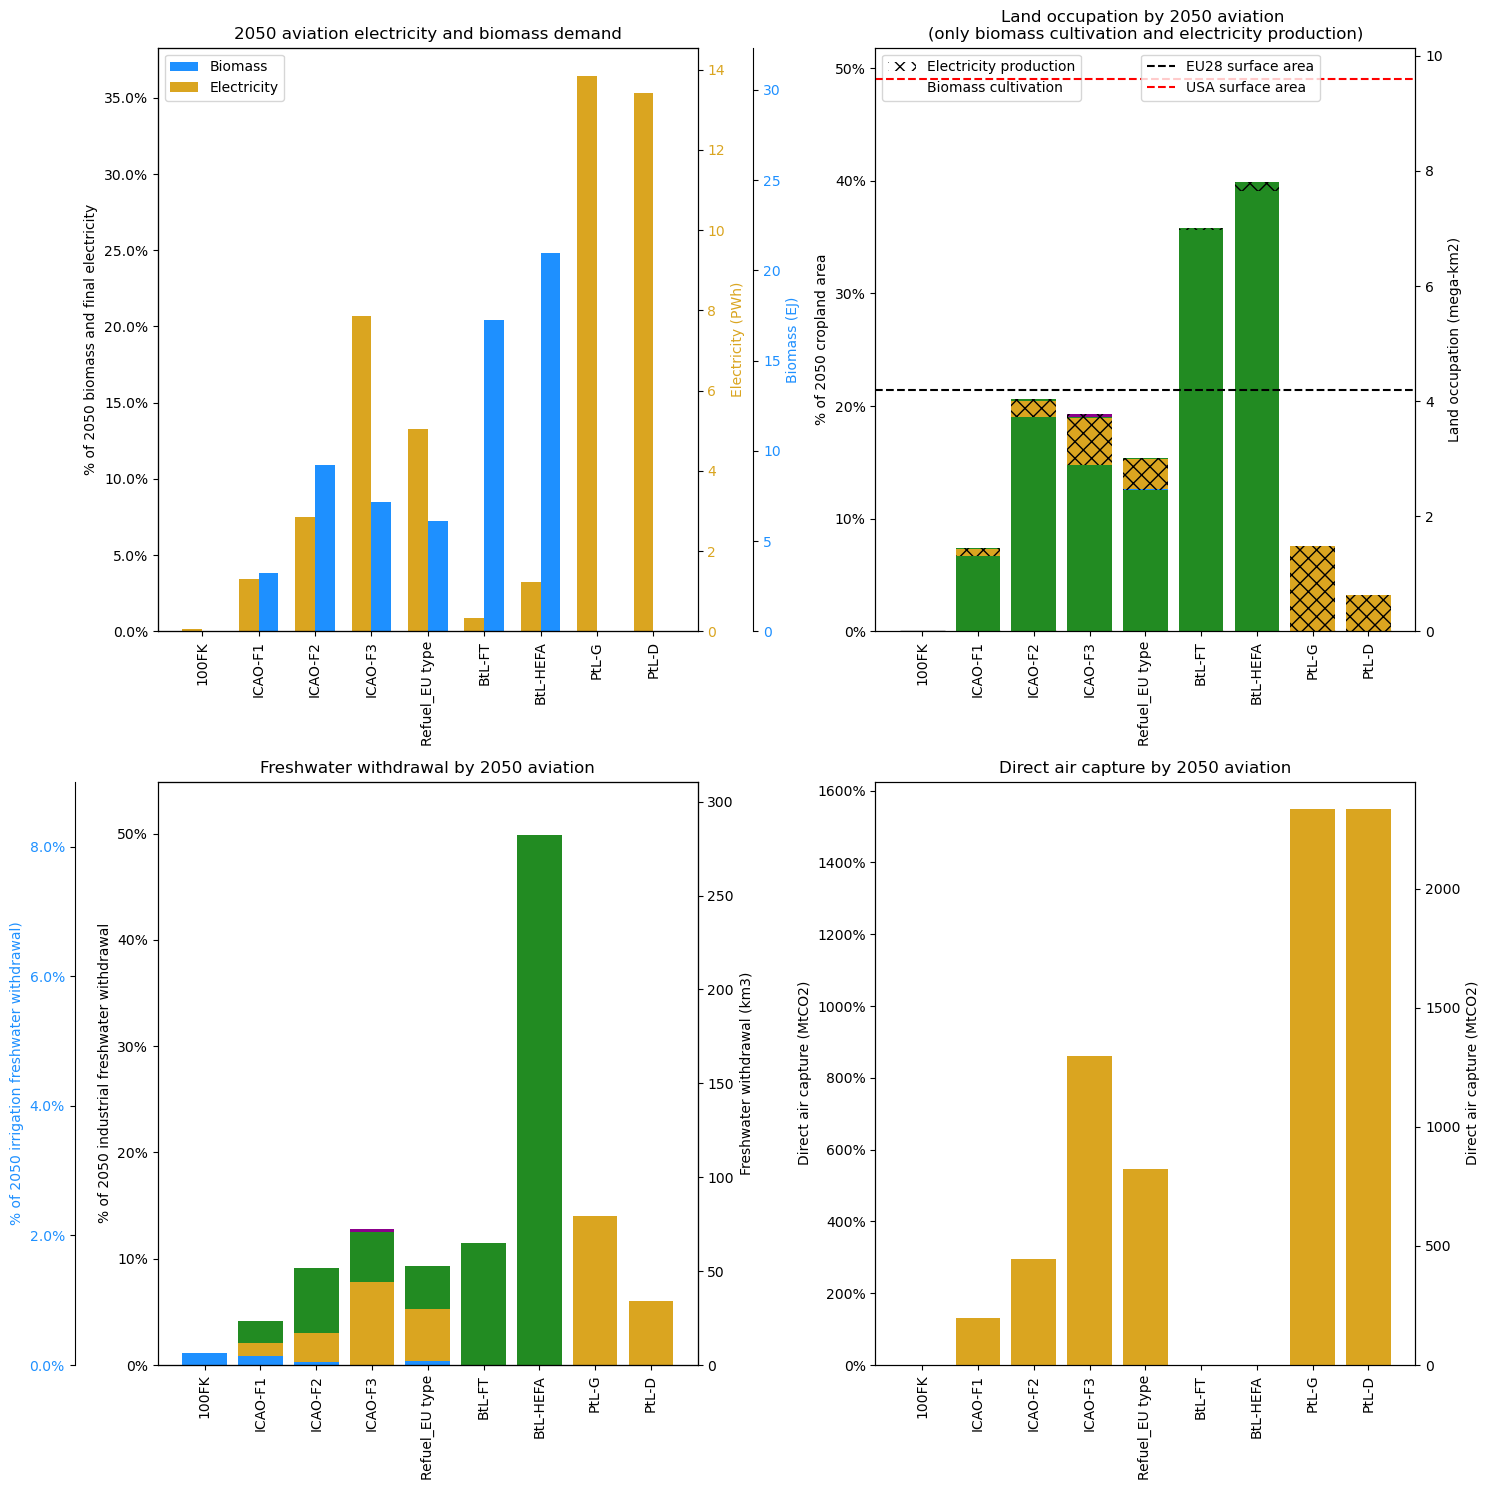

In [382]:
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
scenarios_fig4=['100FK', 'ICAO-F1', 'ICAO-F2', 'ICAO-F3', 'Refuel_EU type','BtL-FT','BtL-HEFA','PtL-G','PtL-D']
fig, axs=plt.subplots(2,2, figsize=(15,15))

# Figure 4.a
barresbiomasse=[]
barreselec=[]
barwidth=0.35
indices=np.arange(len(scenarios_fig4))
for (nom,ptl,bio) in combinaisons_a_afficher:
    barresbiomasse.append(100*dict_biomass[nom][ptl][bio]*1e-12/84.471)
    barreselec.append(100*dict_electricity[nom][ptl][bio]*3.6e-12/136.793)
axs[0,0].bar(indices+barwidth/2,barresbiomasse,color='dodgerblue',width=barwidth, label='Biomass')
axs[0,0].bar(indices-barwidth/2,barreselec,color='goldenrod',width=barwidth, label='Electricity')
axs[0,0].set_xticks(indices, scenarios_fig4, rotation=90)
axs[0,0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0,0].set_ylabel('% of 2050 biomass and final electricity')
ax2=axs[0,0].twinx()
ax2.set_ylim(axs[0,0].get_ylim()[0]*136.793/360,axs[0,0].get_ylim()[1]*136.793/360)
ax2.set_ylabel('Electricity (PWh)', color='goldenrod')
ax2.tick_params(axis='y', labelcolor='goldenrod')

# Trace la troisième série de données sur le troisième axe y
ax3=axs[0,0].twinx()
ax3.set_ylabel('Biomass (EJ)', color='dodgerblue')
ax3.set_ylim(axs[0,0].get_ylim()[0]*84.471/100,axs[0,0].get_ylim()[1]*84.471/100)
ax3.tick_params(axis='y', labelcolor='dodgerblue', direction='out')
ax3.yaxis.set_ticks_position('right')

ax3.spines['right'].set_position(('outward', 40))  # Décalage supplémentaire
axs[0,0].legend()
axs[0,0].set_title('2050 aviation electricity and biomass demand')


# Figure 4.b
for (nom,ptl,bio) in combinaisons_a_afficher:
    for categorie in fuel_categories:
        if categorie=='FK':
            axs[0,1].bar(f'{nom}_{ptl}_{bio}',100*land_occupation_biomass[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050, edgecolor='black',color='dodgerblue')
            axs[0,1].bar(f'{nom}_{ptl}_{bio}',100*land_occupation[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050,bottom=100*(land_occupation_biomass[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['PtL']+land_occupation_biomass[nom][ptl][bio]['Bio']+land_occupation_biomass[nom][ptl][bio]['LH2'])/cropland_and_energy_crops_land_cover_2050, facecolor='dodgerblue', hatch='xx')
        if categorie=='PtL':
            axs[0,1].bar(f'{nom}_{ptl}_{bio}',100*land_occupation_biomass[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050, bottom=100*land_occupation_biomass[nom][ptl][bio]['FK']/cropland_and_energy_crops_land_cover_2050,color='goldenrod')
            axs[0,1].bar(f'{nom}_{ptl}_{bio}',100*land_occupation[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050,bottom=100*(land_occupation[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['PtL']+land_occupation_biomass[nom][ptl][bio]['Bio']+land_occupation_biomass[nom][ptl][bio]['LH2'])/cropland_and_energy_crops_land_cover_2050, facecolor='goldenrod', hatch='xx')
        if categorie=='Bio':
            axs[0,1].bar(f'{nom}_{ptl}_{bio}',100*land_occupation_biomass[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050, bottom=100*(land_occupation_biomass[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['PtL'])/cropland_and_energy_crops_land_cover_2050,color='forestgreen')
            axs[0,1].bar(f'{nom}_{ptl}_{bio}',100*land_occupation[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050,bottom=100*(land_occupation[nom][ptl][bio]['FK']+land_occupation[nom][ptl][bio]['PtL']+land_occupation_biomass[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['PtL']+land_occupation_biomass[nom][ptl][bio]['Bio']+land_occupation_biomass[nom][ptl][bio]['LH2'])/cropland_and_energy_crops_land_cover_2050,color='forestgreen', hatch='xx')
        if categorie=='LH2':
            axs[0,1].bar(f'{nom}_{ptl}_{bio}',100*land_occupation_biomass[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050, bottom=100*(land_occupation_biomass[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['PtL']+land_occupation_biomass[nom][ptl][bio]['Bio'])/cropland_and_energy_crops_land_cover_2050,color='darkmagenta')
            axs[0,1].bar(f'{nom}_{ptl}_{bio}',100*land_occupation[nom][ptl][bio][categorie]/cropland_and_energy_crops_land_cover_2050,bottom=100*(land_occupation[nom][ptl][bio]['FK']+land_occupation[nom][ptl][bio]['PtL']+land_occupation[nom][ptl][bio]['Bio']+land_occupation_biomass[nom][ptl][bio]['FK']+land_occupation_biomass[nom][ptl][bio]['PtL']+land_occupation_biomass[nom][ptl][bio]['Bio']+land_occupation_biomass[nom][ptl][bio]['LH2'])/cropland_and_energy_crops_land_cover_2050,color='darkmagenta', hatch='xx')
axs[0,1].set_xticklabels(scenarios_fig4, rotation=90)
axs[0,1].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0,1].set_ylim(0,axs[0,1].get_ylim()[1]*1.3)
ax2=axs[0,1].twinx()
ax2.set_ylim(1e-6*axs[0,1].get_ylim()[0]*cropland_and_energy_crops_land_cover_2050/100,1e-6*axs[0,1].get_ylim()[1]*cropland_and_energy_crops_land_cover_2050/100)
ax2.set_ylabel('Land occupation (mega-km2)')
ax2.axhline(y=4.2, color='black', linestyle='--', label='EU28 surface area')
ax2.axhline(y=9.6, color='red', linestyle='--', label='USA surface area')
ax2.legend(loc='upper left', bbox_to_anchor=(0.48, 1))
axs[0,1].set_ylabel('% of 2050 cropland area')
plt.title('Land occupation by 2050 aviation \n(only biomass cultivation and electricity production)')
a_val = 0.6
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'xx',label='Electricity production')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='',label='Biomass cultivation')
axs[0,1].legend(handles = [circ1,circ2],loc=2)

# Figure 4.c

for (nom,ptl,bio) in combinaisons_a_afficher:
    for categorie in fuel_categories:
        if categorie=='FK':
            axs[1,0].bar(f'{nom}_{ptl}_{bio}',100*freshwater_withdrawal[nom][ptl][bio][categorie]/industrial_water_withdrawal_2050, color='dodgerblue')
        if categorie=='PtL':
            axs[1,0].bar(f'{nom}_{ptl}_{bio}',100*freshwater_withdrawal[nom][ptl][bio][categorie]/industrial_water_withdrawal_2050, bottom=100*(freshwater_withdrawal[nom][ptl][bio]['FK'])/industrial_water_withdrawal_2050,color='goldenrod')
        if categorie=='Bio':
            axs[1,0].bar(f'{nom}_{ptl}_{bio}',100*freshwater_withdrawal[nom][ptl][bio][categorie]/industrial_water_withdrawal_2050, bottom=100*(freshwater_withdrawal[nom][ptl][bio]['FK']+freshwater_withdrawal[nom][ptl][bio]['PtL'])/industrial_water_withdrawal_2050,color='forestgreen')
        if categorie=='LH2':
            axs[1,0].bar(f'{nom}_{ptl}_{bio}',100*freshwater_withdrawal[nom][ptl][bio][categorie]/industrial_water_withdrawal_2050, bottom=100*(freshwater_withdrawal[nom][ptl][bio]['FK']+freshwater_withdrawal[nom][ptl][bio]['PtL']+freshwater_withdrawal[nom][ptl][bio]['Bio'])/industrial_water_withdrawal_2050,color='darkmagenta')
axs[1,0].set_xticklabels(scenarios_fig4, rotation=90)
axs[1,0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[1,0].set_ylim(0,axs[1,0].get_ylim()[1]*1.1)
axs[1,0].set_title('Freshwater withdrawal by 2050 aviation')
ax2=axs[1,0].twinx()
ax2.set_ylim(axs[1,0].get_ylim()[0]*industrial_water_withdrawal_2050/100,axs[1,0].get_ylim()[1]*industrial_water_withdrawal_2050/100)
ax2.set_ylabel('Freshwater withdrawal (km3)')
axs[1,0].set_ylabel('% of 2050 industrial freshwater withdrawal')
# Trace la troisième série de données sur le troisième axe y
ax3=axs[1,0].twinx()
ax3.set_ylabel('% of 2050 irrigation freshwater withdrawal)', color='dodgerblue')
ax3.set_ylim(axs[1,0].get_ylim()[0]*industrial_water_withdrawal_2050/irrigation_water_withdrawal_2050,axs[1,0].get_ylim()[1]*industrial_water_withdrawal_2050/irrigation_water_withdrawal_2050)
ax3.tick_params(axis='y', labelcolor='dodgerblue', direction='out')
ax3.yaxis.set_ticks_position('left')
ax3.yaxis.set_label_position('left')
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.spines['left'].set_position(('outward', 60))  # Décalage supplémentaire


# Figure 4.d representing the DAC needed per scenario
for (nom,ptl,bio) in combinaisons_a_afficher:
    DAC_annual=demande_énergétique(2023, 2050, traffic_2023, 0.036, mj_aviation_2023 / traffic_2023, 0.015, nom)[1][27]*DAC_per_MJ_PtL*1e-9
    axs[1,1].bar(f'{nom}-{ptl}-{bio}',DAC_annual, color='goldenrod')
axs[1,1].set_xticks(indices, scenarios_fig4, rotation=90)
axs[1,1].yaxis.set_major_formatter(mtick.PercentFormatter())
ax2=axs[1,1].twinx()
ax2.set_ylim(1e-9*axs[1,1].get_ylim()[0]*DAC_2050_Remind_SSP2_RCP26/100,1e-9*axs[1,1].get_ylim()[1]*DAC_2050_Remind_SSP2_RCP26/100)
ax2.set_ylabel('Direct air capture (MtCO2)')
axs[1,1].set_ylabel('% of 2050 DACCS')
axs[1,1].set_ylabel('Direct air capture (MtCO2)')
axs[1,1].set_title('Direct air capture by 2050 aviation')



plt.tight_layout()
plt.show()

# Figure 5

## Traffic growth loop

In [385]:
# Calculation time: 8min 30s
dictionnaire_AESA_trafic={}
traffic_growth=np.linspace(-0.1, 0.1, 200)
for trafic in traffic_growth:
    dictionnaire_AESA_trafic[trafic]={}
    # Emissions
    impacts = {}
    nom_scenario=['100FK','ICAO-F1','ICAO-F2','ICAO-F3','Refuel_EU type','0FK_PtL','0FK_Bio']
    choix_ptl=['PtLWG','PtL-D']
    choix_bio=['Biofuelsmix-FT','Biofuelsmix-HEFA']
    fuel_categories=['FK', 'PtL', 'Bio', 'LH2']
    categorie_emissions=['CO2','CO2nonfossil','CO2capture']
    for nom in nom_scenario:
        FK, PtL, Bio, LH2 = demande_énergétique(2023, 2050, traffic_2023, trafic, mj_aviation_2023/traffic_2023, 0.015, nom)
        impacts[nom]={}
        for ptl in choix_ptl:
            impacts[nom][ptl]={}
            for bio in choix_bio:
                impacts[nom][ptl][bio]={}
                for categorie in fuel_categories:
                    if categorie not in impacts[nom][ptl][bio]:
                        impacts[nom][ptl][bio][categorie]={}
                        impacts[nom][ptl][bio][categorie]['CO2emissions']={}
                        impacts[nom][ptl][bio][categorie]['RF']={}
                        impacts[nom][ptl][bio][categorie]['PPM']={}
                        impacts[nom][ptl][bio][categorie]['RFtotal']={}
                        impacts[nom][ptl][bio][categorie]['PPMtotal']={}
                        impacts[nom][ptl][bio][categorie]['BIICC']={}
                        impacts[nom][ptl][bio][categorie]['BIItotal']={}
                        for emissions in categorie_emissions:
                            if emissions not in impacts[nom][ptl][bio][categorie]['RF']:
                                impacts[nom][ptl][bio][categorie]['RF'][emissions]={}
                            if emissions not in impacts[nom][ptl][bio][categorie]['PPM']:
                                impacts[nom][ptl][bio][categorie]['PPM'][emissions]={}
                    for PB in EFs:
                        impacts[nom][ptl][bio][categorie][PB]={}
                        for i in range(7):
                            if categorie =='FK':
                                impacts[nom][ptl][bio][categorie][PB][i]=FK[i]*dictionnaire_EF['FK'][PB][0]
                            elif categorie=='LH2':
                                impacts[nom][ptl][bio][categorie][PB][i]=LH2[i]*dictionnaire_EF['LH2'][PB][0]
                            elif categorie=='PtL':
                                impacts[nom][ptl][bio][categorie][PB][i]=PtL[i]*dictionnaire_EF[ptl][PB][0]
                            elif categorie=="Bio":
                                impacts[nom][ptl][bio][categorie][PB][i]=Bio[i]*dictionnaire_EF[bio][PB][0]
                        for i in range(7, 17):
                            if categorie =='FK':
                                impacts[nom][ptl][bio][categorie][PB][i]=FK[i]*dictionnaire_EF['FK'][PB][1]
                            elif categorie=='LH2':
                                impacts[nom][ptl][bio][categorie][PB][i]=LH2[i]*dictionnaire_EF['LH2'][PB][1]
                            if categorie=='PtL':
                                impacts[nom][ptl][bio][categorie][PB][i]=PtL[i]*dictionnaire_EF[ptl][PB][1]
                            if categorie=="Bio":
                                impacts[nom][ptl][bio][categorie][PB][i]=Bio[i]*dictionnaire_EF[bio][PB][1]
                        for i in range(17, 27):
                            if categorie =='FK':
                                impacts[nom][ptl][bio][categorie][PB][i]=FK[i]*dictionnaire_EF['FK'][PB][2]
                            elif categorie=='LH2':
                                impacts[nom][ptl][bio][categorie][PB][i]=LH2[i]*dictionnaire_EF['LH2'][PB][2]
                            if categorie=='PtL':
                                impacts[nom][ptl][bio][categorie][PB][i]=PtL[i]*dictionnaire_EF[ptl][PB][2]
                            if categorie=="Bio":
                                impacts[nom][ptl][bio][categorie][PB][i]=Bio[i]*dictionnaire_EF[bio][PB][2]
                        for i in range(27, 28):
                            if categorie =='FK':
                                impacts[nom][ptl][bio][categorie][PB][i]=FK[i]*dictionnaire_EF['FK'][PB][3]
                            elif categorie=='LH2':
                                impacts[nom][ptl][bio][categorie][PB][i]=LH2[i]*dictionnaire_EF['LH2'][PB][3]
                            if categorie=='PtL':
                                impacts[nom][ptl][bio][categorie][PB][i]=PtL[i]*dictionnaire_EF[ptl][PB][3]
                            if categorie=="Bio":
                                impacts[nom][ptl][bio][categorie][PB][i]=Bio[i]*dictionnaire_EF[bio][PB][3]     
                    for i in range(28):
                        impacts[nom][ptl][bio][categorie]['CO2emissions'][i]=impacts[nom][ptl][bio][categorie]['CO2'][i]+impacts[nom][ptl][bio][categorie]['CO2nonfossil'][i]+impacts[nom][ptl][bio][categorie]['CO2capture'][i]
    for nom in nom_scenario:
        for ptl in choix_ptl:
            for bio in choix_bio:
                for categorie in fuel_categories:
                    for emissions in emissions_categories:
                        impact_climat=dynamic_climate_change_impact_assessment(impacts[nom][ptl][bio])
                        impacts[nom][ptl][bio][categorie]['RF'][emissions]=impact_climat['RF'][categorie][emissions]
                        impacts[nom][ptl][bio][categorie]['PPM'][emissions]=impact_climat['PPM'][categorie][emissions]
                    for i in range(28):
                        impacts[nom][ptl][bio][categorie]['RFtotal'][i]=impacts[nom][ptl][bio][categorie]['RF']['CO2'][i]+impacts[nom][ptl][bio][categorie]['RF']['CO2nonfossil'][i]+impacts[nom][ptl][bio][categorie]['RF']['CO2capture'][i]+impacts[nom][ptl][bio][categorie]['RF']['CH4'][i]+impacts[nom][ptl][bio][categorie]['RF']['N2O'][i]
                        impacts[nom][ptl][bio][categorie]['PPMtotal'][i]=impacts[nom][ptl][bio][categorie]['PPM']['CO2'][i]+impacts[nom][ptl][bio][categorie]['PPM']['CO2nonfossil'][i]+impacts[nom][ptl][bio][categorie]['PPM']['CO2capture'][i]+impacts[nom][ptl][bio][categorie]['PPM']['CH4'][i]+impacts[nom][ptl][bio][categorie]['PPM']['N2O'][i]
                        impacts[nom][ptl][bio][categorie]['BIICC'][i]=CF_BII_climate*impacts[nom][ptl][bio][categorie]['RFtotal'][i]
                        impacts[nom][ptl][bio][categorie]['BIItotal'][i]=impacts[nom][ptl][bio][categorie]['BIICC'][i]+impacts[nom][ptl][bio][categorie]['BIIDLU'][i]
    dictionnaire_AESA={}
    liste_downscaling=['FHN', 'GDP','GDP_without_tourism']
    for nom in nom_scenario:
        dictionnaire_AESA[nom]={}
        for ptl in choix_ptl:
            dictionnaire_AESA[nom][ptl]={}
            for bio in choix_bio:
                dictionnaire_AESA[nom][ptl][bio]={}
                for categorie in fuel_categories:
                    dictionnaire_AESA[nom][ptl][bio][categorie]={}
                    for downscaling in liste_downscaling:
                            dictionnaire_AESA[nom][ptl][bio][categorie][downscaling]={}
                            for PB in PBs:
                                dictionnaire_AESA[nom][ptl][bio][categorie][downscaling][PB]={}
    for nom in nom_scenario:
        for ptl in choix_ptl:
            for bio in choix_bio:
                for categorie in fuel_categories:
                    for downscaling in liste_downscaling:
                        for PB in PBs:
                            dictionnaire_AESA[nom][ptl][bio][categorie][downscaling][PB]=aesa(PB_aviation[downscaling][PB], impacts[nom][ptl][bio][categorie][PB])
    dictionnaire_AESA_trafic[trafic]=dictionnaire_AESA

## Boucle transgression

In [386]:
dictionnaire_transgression={}
for downscaling in liste_downscaling:
    dictionnaire_transgression[downscaling]={}
    for nom in nom_scenario:
        dictionnaire_transgression[downscaling][nom]={}
        for ptl in choix_ptl:
            dictionnaire_transgression[downscaling][nom][ptl]={}
            for bio in choix_bio:
                dictionnaire_transgression[downscaling][nom][ptl][bio]={}
                trafic_limite=0
                for PB in PBs:
                    dictionnaire_transgression[downscaling][nom][ptl][bio][PB]={}
                    for trafic in traffic_growth:
                        somme=0
                        if PB=='LSC':
                            for categories in fuel_categories: 
                                for i in range(28):
                                    somme=somme+dictionnaire_AESA_trafic[trafic][nom][ptl][bio][categories][downscaling]['LSC'][i]                       
                        for categories in fuel_categories:
                            somme=somme+dictionnaire_AESA_trafic[trafic][nom][ptl][bio][categories][downscaling][PB][27]
                        if PB=='RFtotal':
                            somme=somme+(historical_rf_2018+historical_rf_2019_2022)/PB_aviation[downscaling]['RFtotal']
                        if PB=='PPMtotal':
                            somme=somme+(historical_ppm_2018+historical_ppm_2019_2022)/PB_aviation[downscaling]['PPMtotal']
                        if PB=='BIItotal':
                            somme=somme+(historical_rf_2018+historical_rf_2019_2022)*CF_BII_climate/PB_aviation[downscaling]['BIItotal']
                        if PB=='BIICC':
                            somme=somme+(historical_rf_2018+historical_rf_2019_2022)*CF_BII_climate/PB_aviation[downscaling]['BIICC']
                        if somme>1:
                            trafic_limite=trafic
                            break
                        elif somme<1:
                            trafic_limite=0.1
                    dictionnaire_transgression[downscaling][nom][ptl][bio][PB]=trafic_limite

C:\Users\ba.pais\AppData\Local\Temp\ipykernel_9496\1423768337.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(scenarios_fig2, rotation=90)


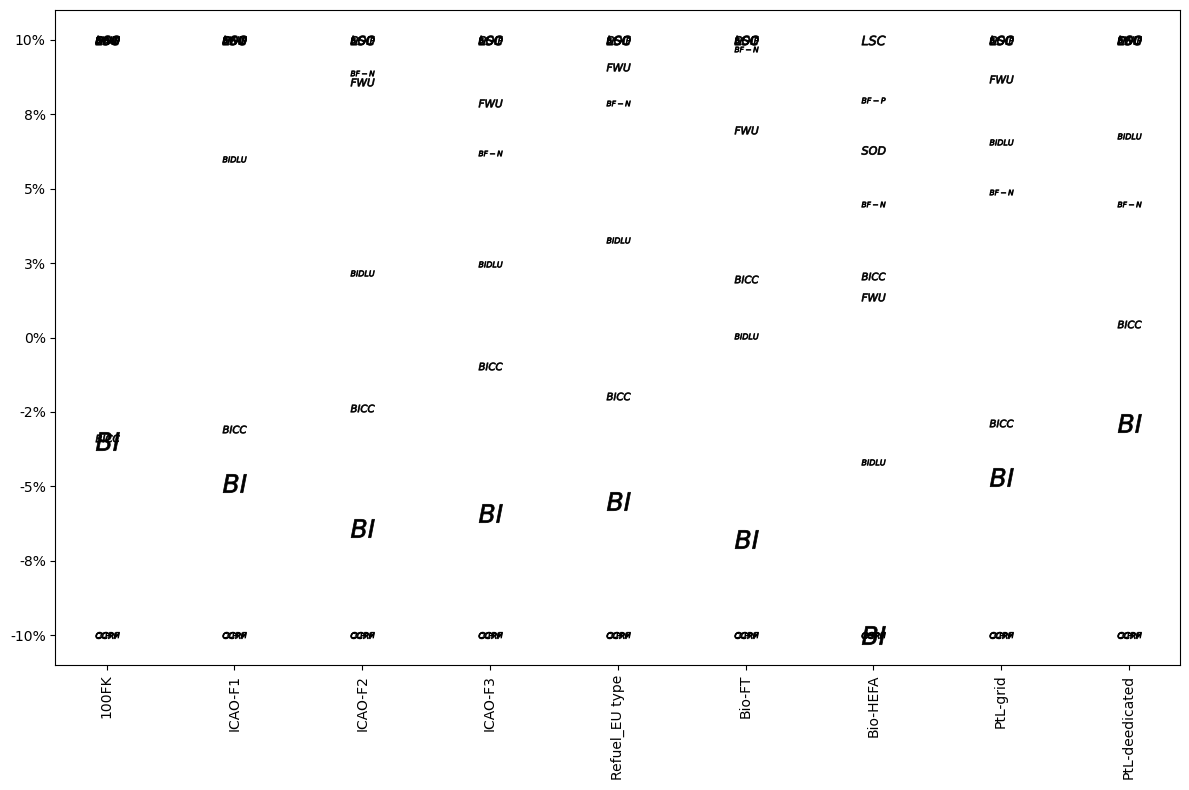

In [387]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from svgpath2mpl import parse_path
fig, ax = plt.subplots(figsize=(12, 8))
markers=["$CCRF$", "$CCPPM$", "$BF-N$", "$BF-P$", "$LSC$", "$SOD$", "$FWU$", "$BIDLU$", "$BICC$", "$BI$"]
scenarios_fig2=['100FK','ICAO-F1','ICAO-F2','ICAO-F3','Refuel_EU type','Bio-FT','Bio-HEFA','PtL-grid','PtL-deedicated']
combinaisons_a_afficher = [
    ('100FK', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F1', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F2', 'PtLWG', 'Biofuelsmix-FT'),
    ('ICAO-F3', 'PtLWG', 'Biofuelsmix-FT'),
    ('Refuel_EU type', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_Bio', 'PtLWG', 'Biofuelsmix-HEFA'),
    ('0FK_PtL', 'PtLWG', 'Biofuelsmix-FT'),
    ('0FK_PtL', 'PtL-D', 'Biofuelsmix-FT')
]
for y, (nom, ptl, bio) in enumerate(combinaisons_a_afficher):
    for i, PB in enumerate(PBs):
        ax.scatter(f'{scenarios_fig2[y]}', dictionnaire_transgression['GDP_without_tourism'][nom][ptl][bio][PB], marker=markers[i],s=300,linewidths=0.5,color='black')
ax.set_xticklabels(scenarios_fig2, rotation=90)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.tight_layout()
plt.show()